# \> Problem Statement :<a
href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#%3E-Problem-Statement-:"
class="anchor-link">¶</a>

As the global demand for sustainable energy grows, wind energy has
emerged as one of the most mature and widely adopted renewable
technologies. However, maintaining wind turbines is both complex and
costly, especially when failures go undetected until critical damage
occurs. ReneWind, a company specializing in wind energy systems, faces
the challenge of predicting generator failures using sensor data
collected from turbine components and environmental conditions. The data
is ciphered for confidentiality and includes 40 predictors across
thousands of observations. The key issue is to accurately identify
potential failures before they occur to minimize costly replacements and
optimize maintenance operations.

# \> Objective :<a
href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#%3E-Objective-:"
class="anchor-link">¶</a>

The objective is to develop and evaluate machine learning classification
models that can predict generator failures in wind turbines using
sensor-derived features. The models should prioritize minimizing false
negatives (missed failures) due to their high replacement cost, while
balancing false positives (unnecessary inspections) and true positives
(repairs). The final model will be selected based on its predictive
performance and its ability to reduce overall maintenance costs when
applied to unseen test data.

In \[26\]:

    pip install tensorflow.keras

    Collecting tensorflow.keras
      Downloading tensorflow_keras-0.1-py3-none-any.whl.metadata (63 bytes)
    Downloading tensorflow_keras-0.1-py3-none-any.whl (5.2 kB)
    Installing collected packages: tensorflow.keras
    Successfully installed tensorflow.keras-0.1

In \[53\]:

    # Libraries to help with reading and manipulating data
    import pandas as pd
    import numpy as np
    # libaries to help with data visualization
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    # Library to encode the variables
    from sklearn.preprocessing import OneHotEncoder
    #Library to scale the data
    from sklearn.preprocessing import RobustScaler
     # Library to split data
    from sklearn.model_selection import train_test_split
    # library to import different optimizers
    from tensorflow.keras import optimizers
    # Library to import different loss functions
    from tensorflow.keras import losses
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import SGD
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.metrics import Precision, Recall

    # Library to avoid the warnings
    import warnings
    warnings.filterwarnings('ignore')
    # importing keras library
    from tensorflow import keras
    # library to convert the target variables to numpy arrays
    from tensorflow.keras.utils import to_categorical
    # library to plot classification report
    from sklearn.metrics import classification_report
    # library to import Batch Normalization
    from tensorflow.keras.layers import BatchNormalization
    # Library to import Dropout
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.optimizers import Adam

    from imblearn.over_sampling import SMOTE

In \[20\]:

    # Load the training data
    df = pd.read_csv('Train.csv')
    df1 = pd.read_csv('Test.csv')

In \[9\]:

    print(df.columns.tolist())

    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'Target']

In \[44\]:

    print(df1.columns.tolist())

    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'Target']

In \[13\]:

    df.head()

Out\[13\]:

|     | V1        | V2        | V3        | V4        | V5        | V6        | V7        | V8        | V9        | V10       | ... | V32       | V33       | V34        | V35      | V36       | V37       | V38       | V39       | V40       | Target |
|-----|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----|-----------|-----------|------------|----------|-----------|-----------|-----------|-----------|-----------|--------|
| 0   | -4.464606 | -4.679129 | 3.101546  | 0.506130  | -0.221083 | -2.032511 | -2.910870 | 0.050714  | -1.522351 | 3.761892  | ... | 3.059700  | -1.690440 | 2.846296   | 2.235198 | 6.667486  | 0.443809  | -2.369169 | 2.950578  | -3.480324 | 0      |
| 1   | 3.365912  | 3.653381  | 0.909671  | -1.367528 | 0.332016  | 2.358938  | 0.732600  | -4.332135 | 0.565695  | -0.101080 | ... | -1.795474 | 3.032780  | -2.467514  | 1.894599 | -2.297780 | -1.731048 | 5.908837  | -0.386345 | 0.616242  | 0      |
| 2   | -3.831843 | -5.824444 | 0.634031  | -2.418815 | -1.773827 | 1.016824  | -2.098941 | -3.173204 | -2.081860 | 5.392621  | ... | -0.257101 | 0.803550  | 4.086219   | 2.292138 | 5.360850  | 0.351993  | 2.940021  | 3.839160  | -4.309402 | 0      |
| 3   | 1.618098  | 1.888342  | 7.046143  | -1.147285 | 0.083080  | -1.529780 | 0.207309  | -2.493629 | 0.344926  | 2.118578  | ... | -3.584425 | -2.577474 | 1.363769   | 0.622714 | 5.550100  | -1.526796 | 0.138853  | 3.101430  | -1.277378 | 0      |
| 4   | -0.111440 | 3.872488  | -3.758361 | -2.982897 | 3.792714  | 0.544960  | 0.205433  | 4.848994  | -1.854920 | -6.220023 | ... | 8.265896  | 6.629213  | -10.068689 | 1.222987 | -3.229763 | 1.686909  | -2.163896 | -3.644622 | 6.510338  | 0      |

5 rows × 41 columns





In \[12\]:

    # 1. Dataset dimensions
    print("Shape of training data:", df.shape)

    # 2. Column names
    print("\nColumn names:")
    print(df.columns.tolist())

    # 3. Data types and non-null counts
    print("\nData types and missing values:")
    print(df.info())

    # 4. Summary statistics for numeric features
    print("\nSummary statistics:")
    print(df.describe())

    # 5. Check for missing values
    # Count missing values per column
    missing_counts = df.isnull().sum()

    # Filter only columns with missing values
    missing_counts = missing_counts[missing_counts > 0]

    # Display results
    print("Missing values per column:")
    print(missing_counts if not missing_counts.empty else "No missing values found.")

    Shape of training data: (20000, 41)

    Column names:
    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'Target']

    Data types and missing values:
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 20000 entries, 0 to 19999
    Data columns (total 41 columns):
     #   Column  Non-Null Count  Dtype  
    ---  ------  --------------  -----  
     0   V1      19982 non-null  float64
     1   V2      19982 non-null  float64
     2   V3      20000 non-null  float64
     3   V4      20000 non-null  float64
     4   V5      20000 non-null  float64
     5   V6      20000 non-null  float64
     6   V7      20000 non-null  float64
     7   V8      20000 non-null  float64
     8   V9      20000 non-null  float64
     9   V10     20000 non-null  float64
     10  V11     20000 non-null  float64
     11  V12     20000 non-null  float64
     12  V13     20000 non-null  float64
     13  V14     20000 non-null  float64
     14  V15     20000 non-null  float64
     15  V16     20000 non-null  float64
     16  V17     20000 non-null  float64
     17  V18     20000 non-null  float64
     18  V19     20000 non-null  float64
     19  V20     20000 non-null  float64
     20  V21     20000 non-null  float64
     21  V22     20000 non-null  float64
     22  V23     20000 non-null  float64
     23  V24     20000 non-null  float64
     24  V25     20000 non-null  float64
     25  V26     20000 non-null  float64
     26  V27     20000 non-null  float64
     27  V28     20000 non-null  float64
     28  V29     20000 non-null  float64
     29  V30     20000 non-null  float64
     30  V31     20000 non-null  float64
     31  V32     20000 non-null  float64
     32  V33     20000 non-null  float64
     33  V34     20000 non-null  float64
     34  V35     20000 non-null  float64
     35  V36     20000 non-null  float64
     36  V37     20000 non-null  float64
     37  V38     20000 non-null  float64
     38  V39     20000 non-null  float64
     39  V40     20000 non-null  float64
     40  Target  20000 non-null  int64  
    dtypes: float64(40), int64(1)
    memory usage: 6.3 MB
    None

    Summary statistics:
                     V1            V2            V3            V4            V5  \
    count  19982.000000  19982.000000  20000.000000  20000.000000  20000.000000   
    mean      -0.271996      0.440430      2.484699     -0.083152     -0.053752   
    std        3.441625      3.150784      3.388963      3.431595      2.104801   
    min      -11.876451    -12.319951    -10.708139    -15.082052     -8.603361   
    25%       -2.737146     -1.640674      0.206860     -2.347660     -1.535607   
    50%       -0.747917      0.471536      2.255786     -0.135241     -0.101952   
    75%        1.840112      2.543967      4.566165      2.130615      1.340480   
    max       15.493002     13.089269     17.090919     13.236381      8.133797   

                     V6            V7            V8            V9           V10  \
    count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
    mean      -0.995443     -0.879325     -0.548195     -0.016808     -0.012998   
    std        2.040970      1.761626      3.295756      2.160568      2.193201   
    min      -10.227147     -7.949681    -15.657561     -8.596313     -9.853957   
    25%       -2.347238     -2.030926     -2.642665     -1.494973     -1.411212   
    50%       -1.000515     -0.917179     -0.389085     -0.067597      0.100973   
    75%        0.380330      0.223695      1.722965      1.409203      1.477045   
    max        6.975847      8.006091     11.679495      8.137580      8.108472   

           ...           V32           V33           V34           V35  \
    count  ...  20000.000000  20000.000000  20000.000000  20000.000000   
    mean   ...      0.303799      0.049825     -0.462702      2.229620   
    std    ...      5.500400      3.575285      3.183841      2.937102   
    min    ...    -19.876502    -16.898353    -17.985094    -15.349803   
    25%    ...     -3.420469     -2.242857     -2.136984      0.336191   
    50%    ...      0.052073     -0.066249     -0.255008      2.098633   
    75%    ...      3.761722      2.255134      1.436935      4.064358   
    max    ...     23.633187     16.692486     14.358213     15.291065   

                    V36           V37           V38           V39           V40  \
    count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
    mean       1.514809      0.011316     -0.344025      0.890653     -0.875630   
    std        3.800860      1.788165      3.948147      1.753054      3.012155   
    min      -14.833178     -5.478350    -17.375002     -6.438880    -11.023935   
    25%       -0.943809     -1.255819     -2.987638     -0.272250     -2.940193   
    50%        1.566526     -0.128435     -0.316849      0.919261     -0.920806   
    75%        3.983939      1.175533      2.279399      2.057540      1.119897   
    max       19.329576      7.467006     15.289923      7.759877     10.654265   

                 Target  
    count  20000.000000  
    mean       0.055500  
    std        0.228959  
    min        0.000000  
    25%        0.000000  
    50%        0.000000  
    75%        0.000000  
    max        1.000000  

    [8 rows x 41 columns]
    Missing values per column:
    V1    18
    V2    18
    dtype: int64

> # Shape : - 20,000 rows & 41 columns<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Shape-:---20,000-rows-&amp;-41-columns"
> class="anchor-link">¶</a>
>
> ### 40 sensor based features and 1 target variable<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#40-sensor-based-features-and-1-target-variable"
> class="anchor-link">¶</a>
>
> # Target: Binary classification<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Target:-Binary-classification"
> class="anchor-link">¶</a>
>
> 1.  0 = No failure , 1 = Failure \# Missing Values:
> 2.  Only V1 and V2 have missing values (18 each)
> 3.  That's just 0.09% of the dataset — can be safely imputed or
>     dropped \# Data Types:
> 4.  All features are float64, target is int64
> 5.  Ready for numerical modeling (no encoding needed)

In \[11\]:

    # Target variable distribution
    print(df['Target'].value_counts())
    print(df['Target'].value_counts(normalize=True))

    Target
    0    18890
    1     1110
    Name: count, dtype: int64
    Target
    0    0.9445
    1    0.0555
    Name: proportion, dtype: float64

In \[14\]:

    #Univariate Analysis
    sns.set(style="whitegrid")
    features = [col for col in df.columns if col != 'Target']

    # Histograms for all features
    for col in features:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

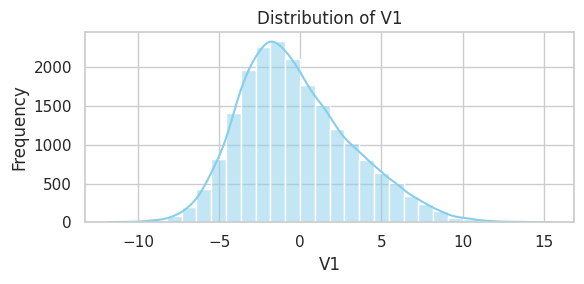

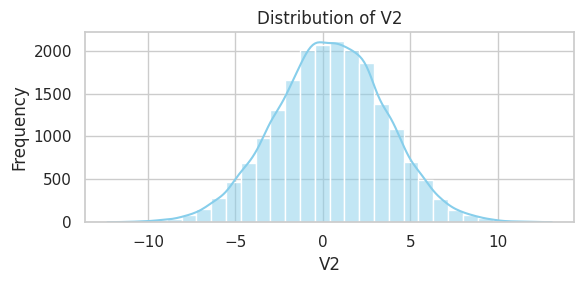

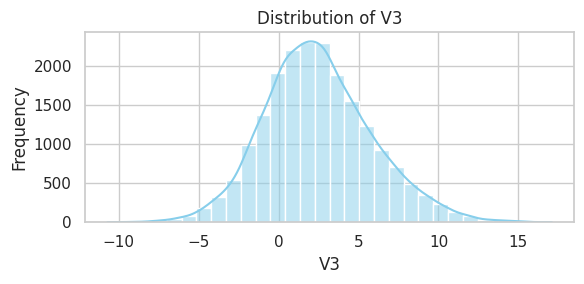

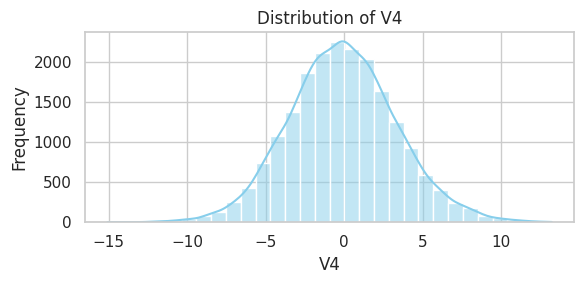

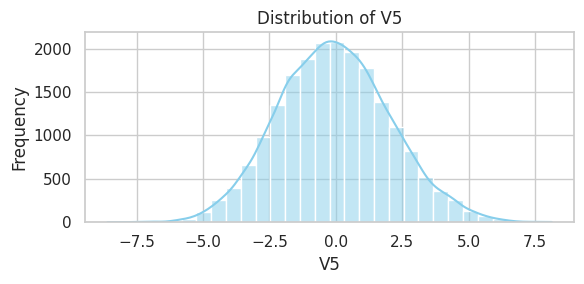

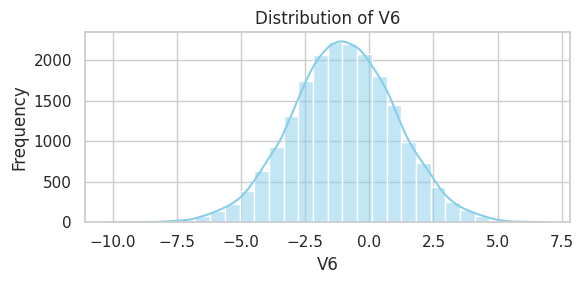

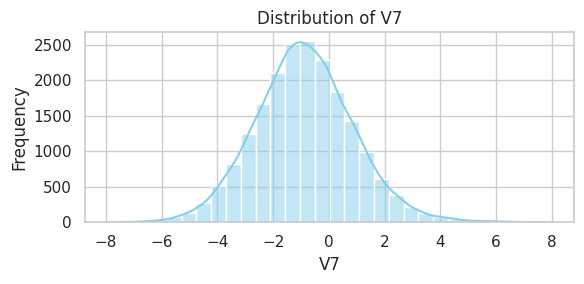

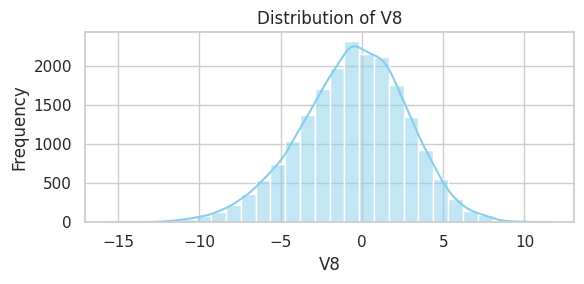

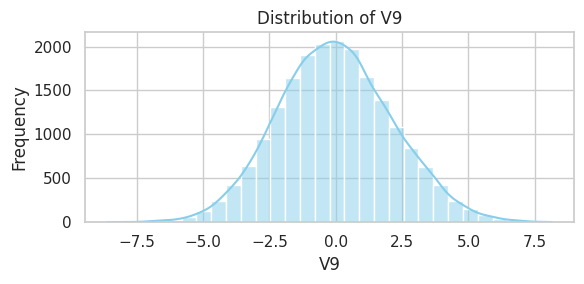

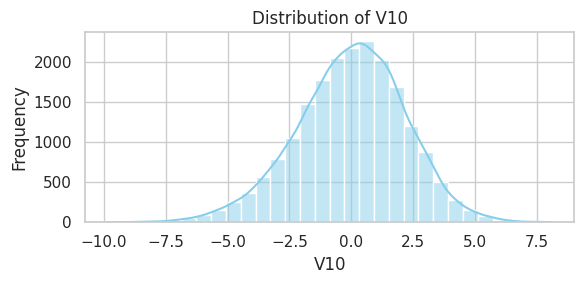

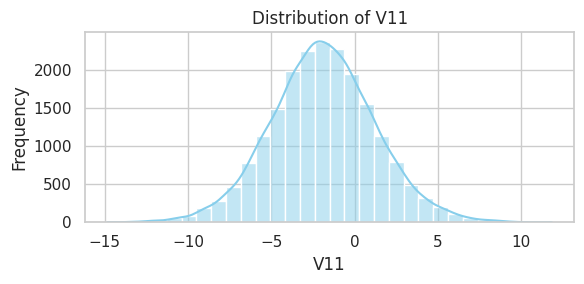

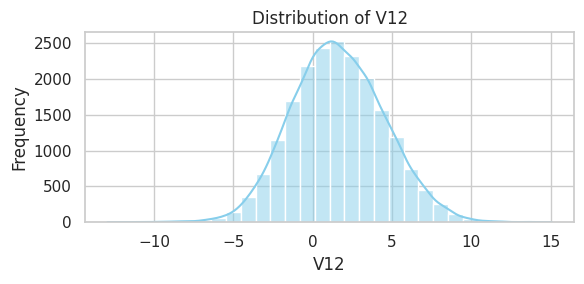

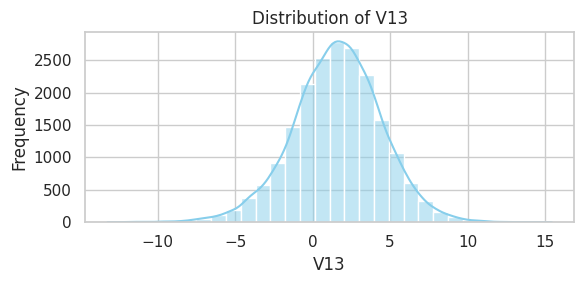

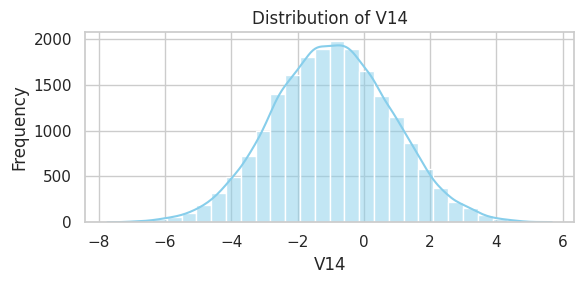

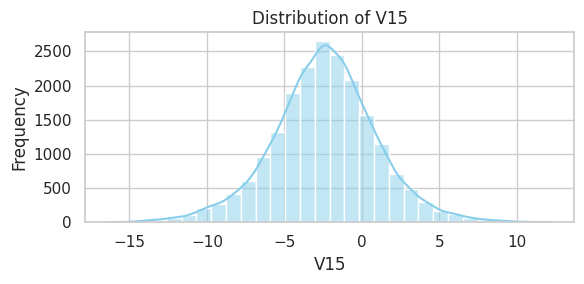

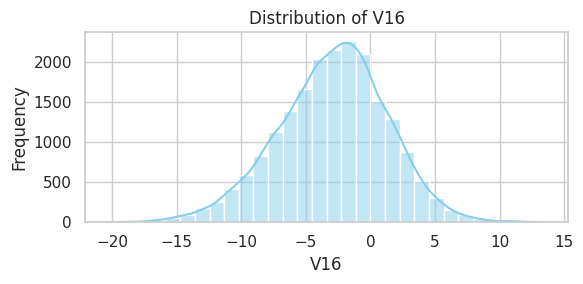

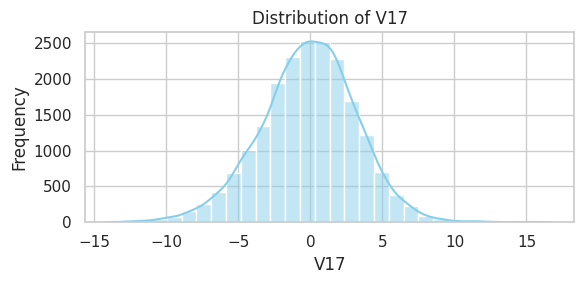

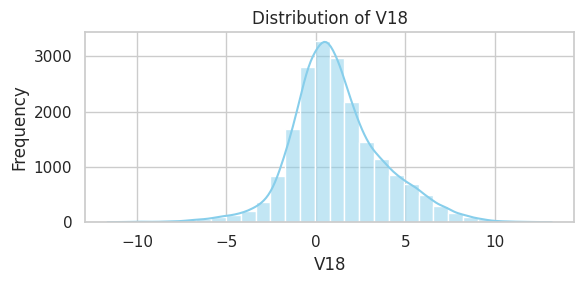

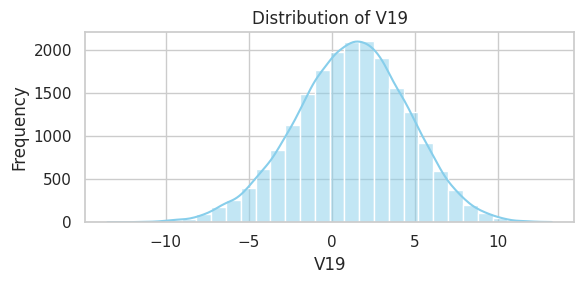

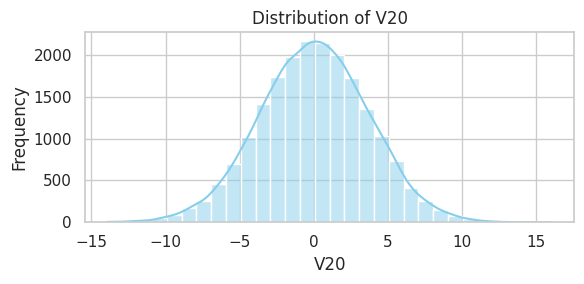

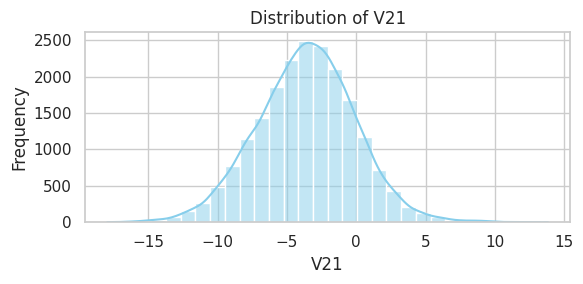

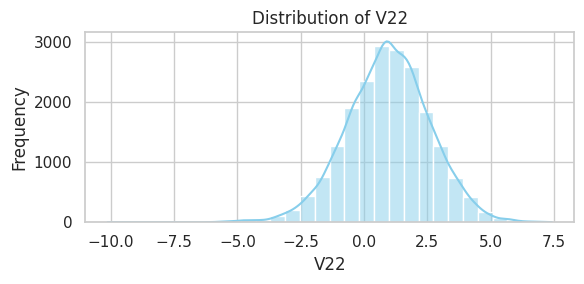

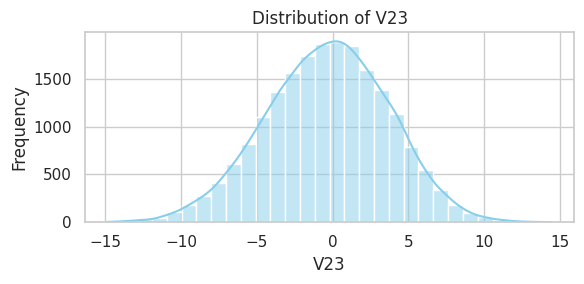

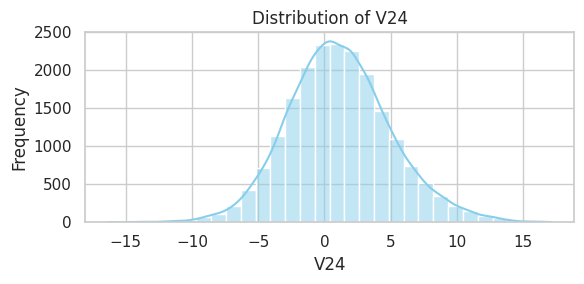

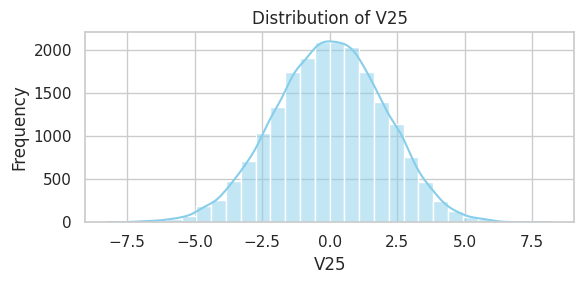

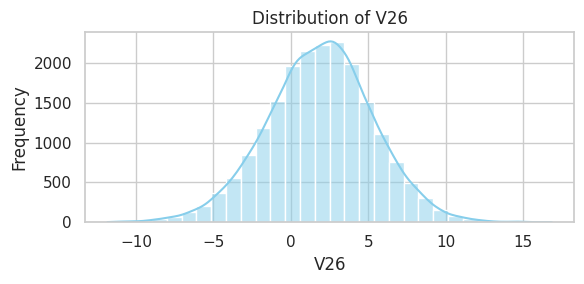

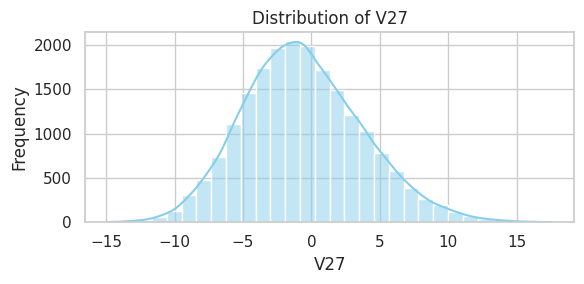

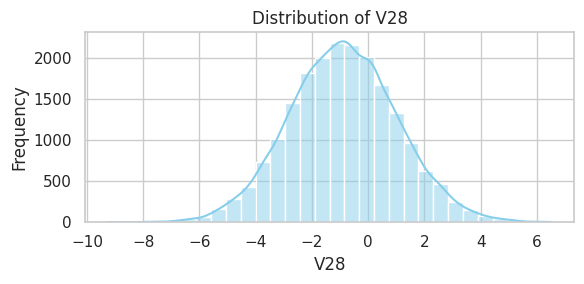

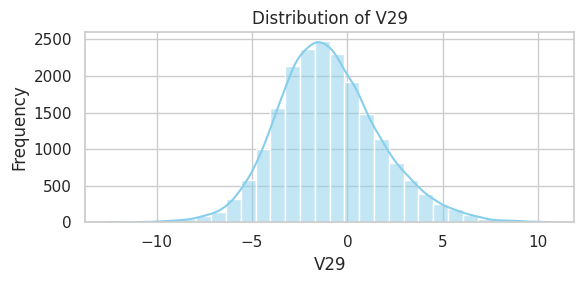

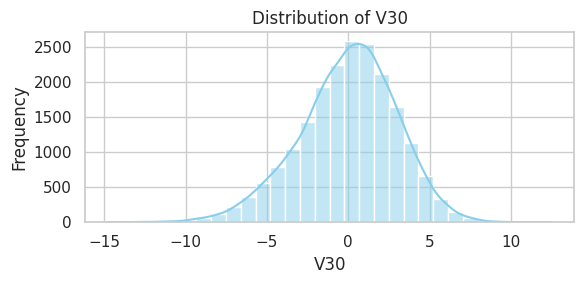

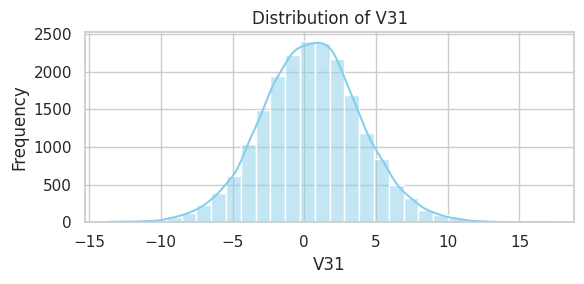

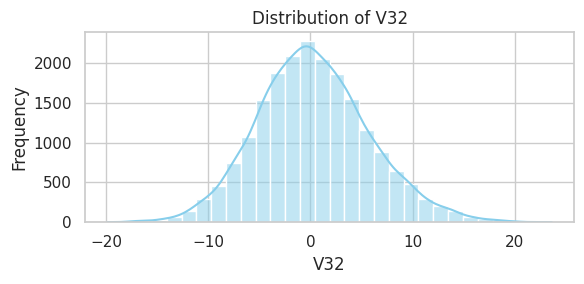

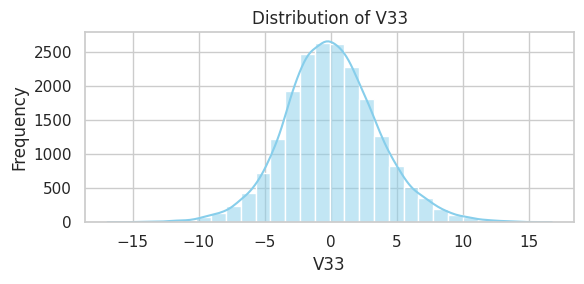

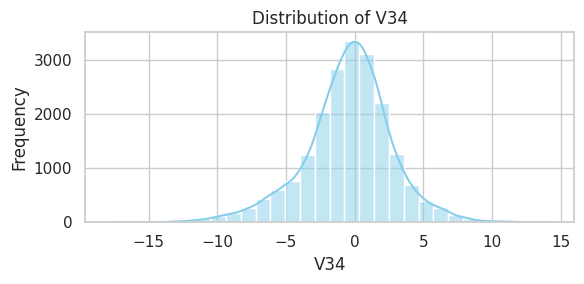

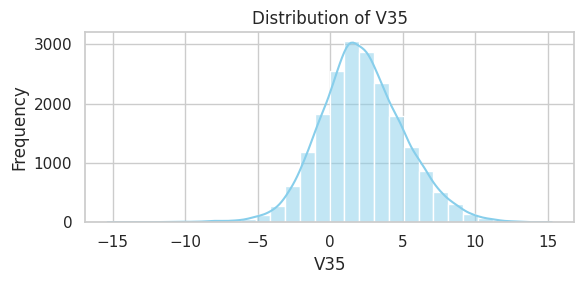

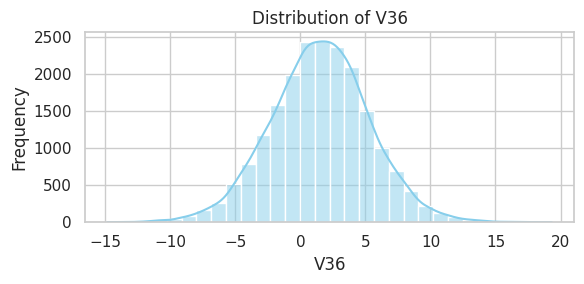

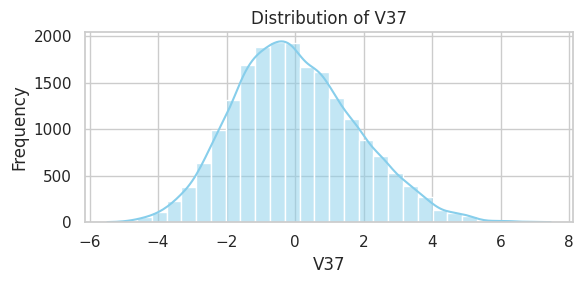

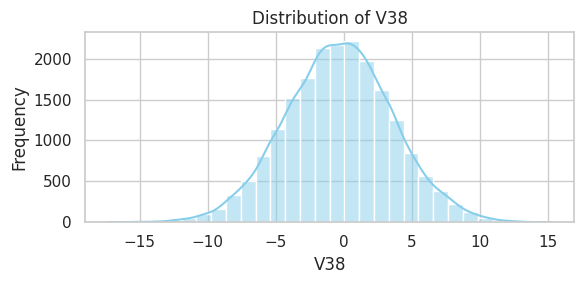

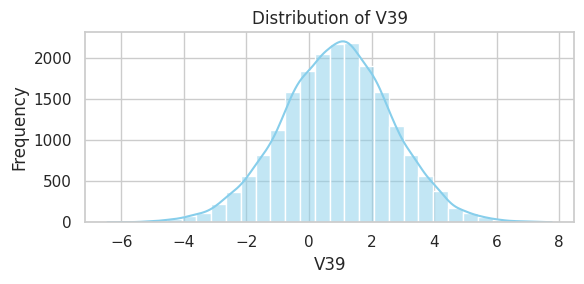

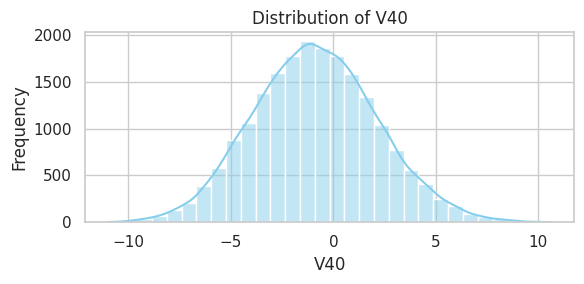

> # Right-Skewed Features:<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Right-Skewed-Features:"
> class="anchor-link">¶</a>
>
> 1.  Values cluster low with a long tail to the right
> 2.  V3, V32, V33, V35, V36, V39
>
> # Left-Skewed Features:<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Left-Skewed-Features:"
> class="anchor-link">¶</a>
>
> 1.  Values cluster high with a long tail to the left:
> 2.  V1, V2, V6, V7, V8, V34, V38, V40
>
> # Symmetric or Near-Normal Features:<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Symmetric-or-Near-Normal-Features:"
> class="anchor-link">¶</a>
>
> 1.  Centered around zero with balanced spread
> 2.  V4, V5, V9, V10, V11, V13, V15 to V31, V37

In \[15\]:

    features = [col for col in df.columns if col != 'Target']
    sns.set(style="whitegrid")

    for col in features:
        plt.figure(figsize=(6, 3))
        sns.kdeplot(data=df[df['Target'] == 0], x=col, label='No Failure (0)', shade=True, color='green')
        sns.kdeplot(data=df[df['Target'] == 1], x=col, label='Failure (1)', shade=True, color='red')
        plt.title(f'Distribution of {col} by Target Class')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        plt.show()

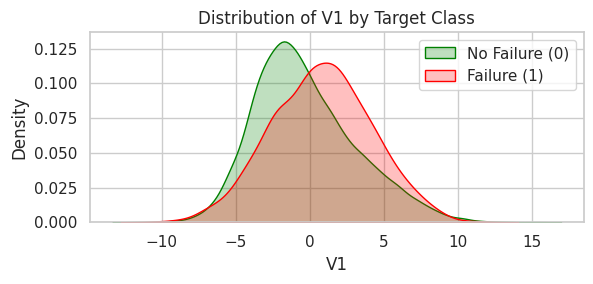

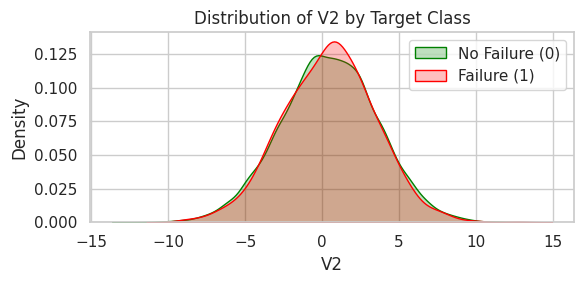

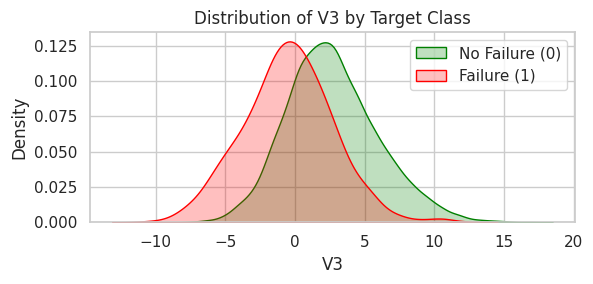

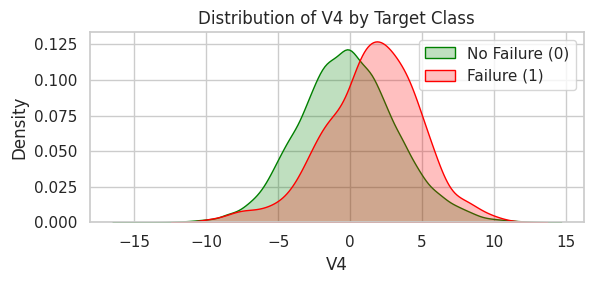

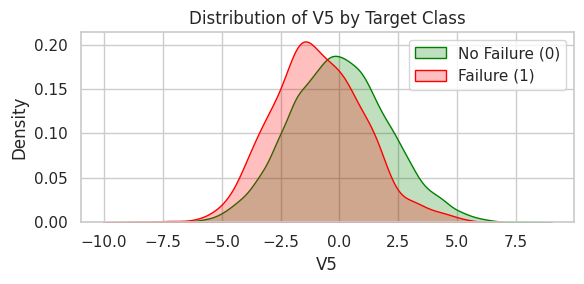

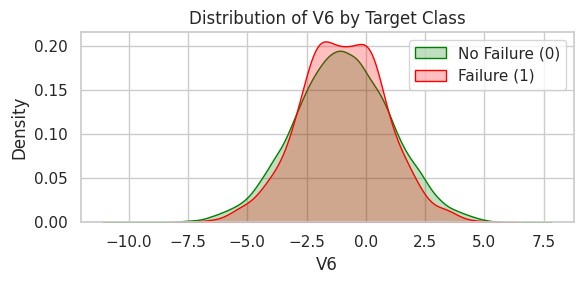

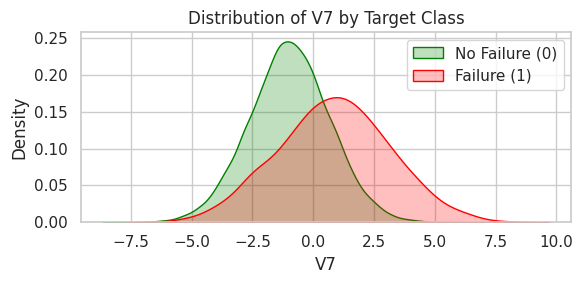

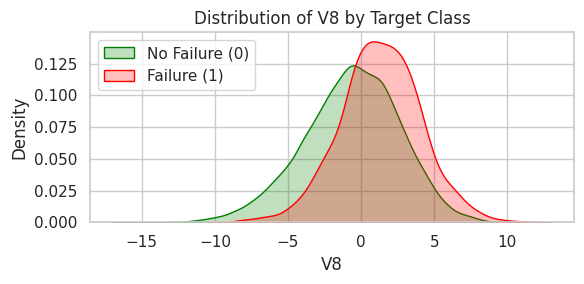

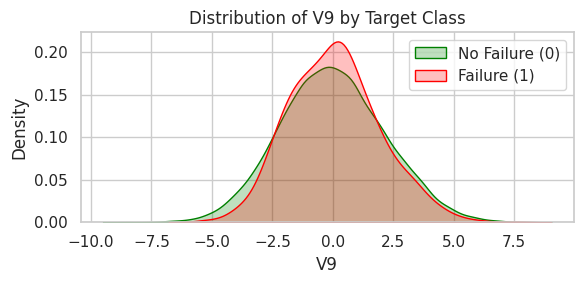

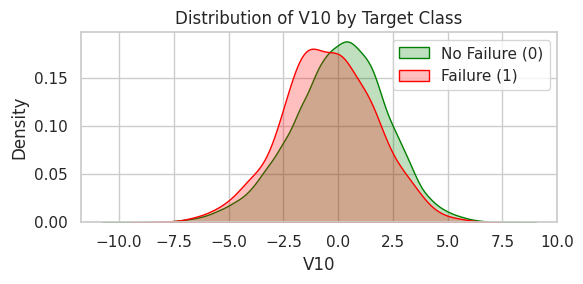

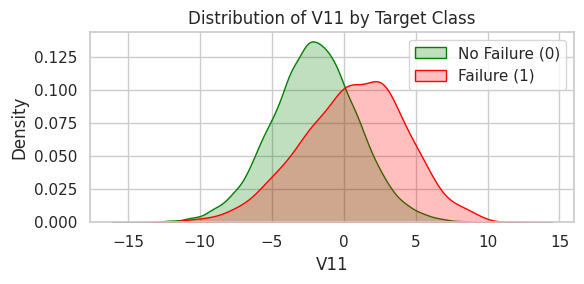

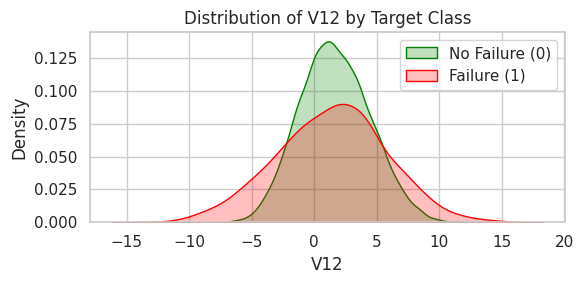

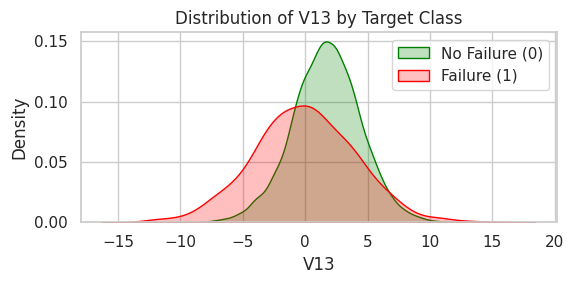

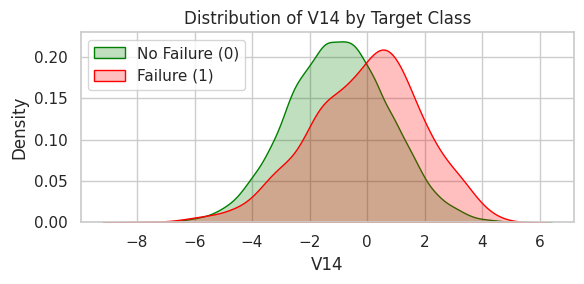

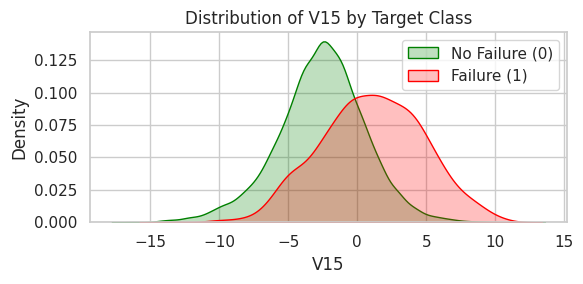

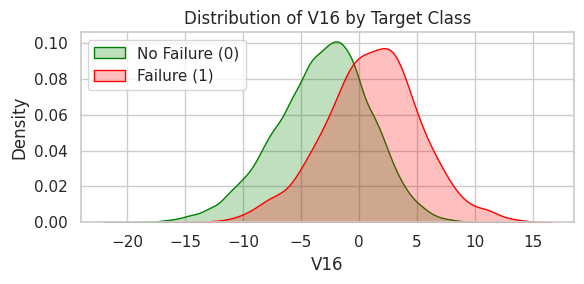

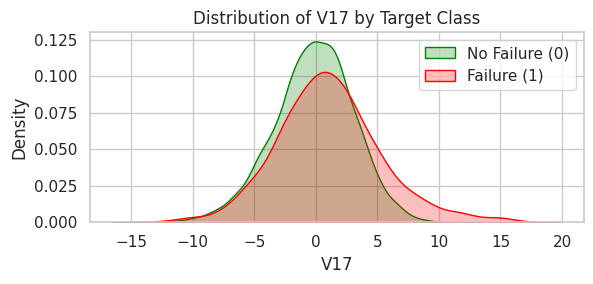

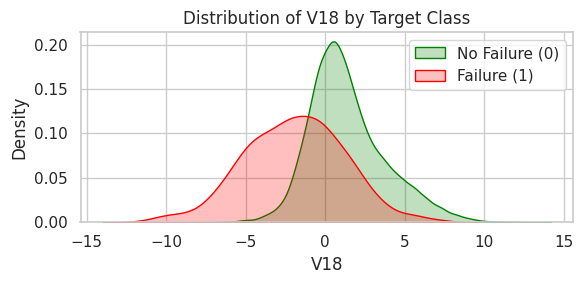

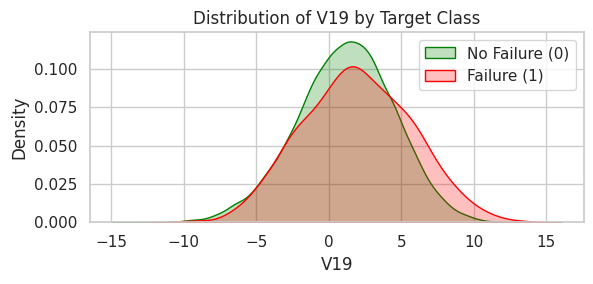

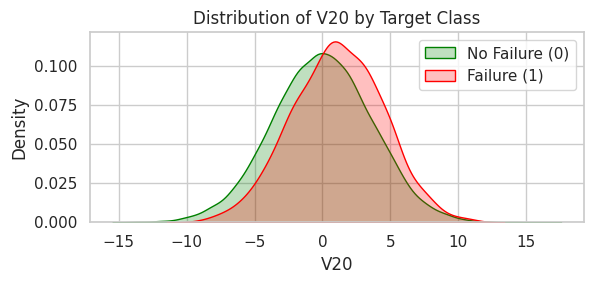

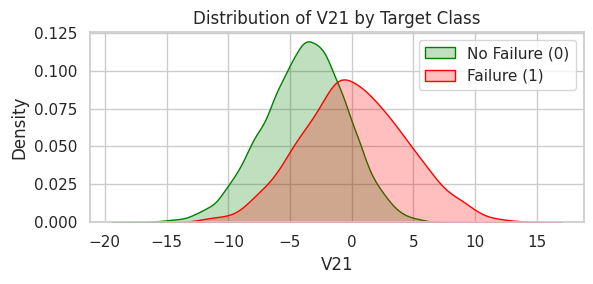

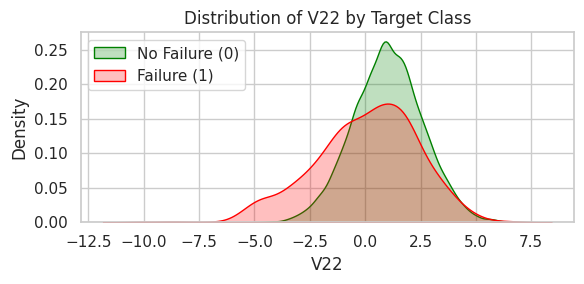

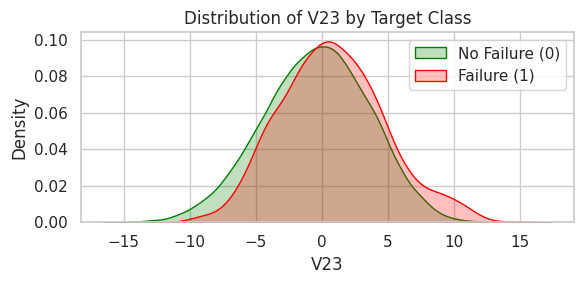

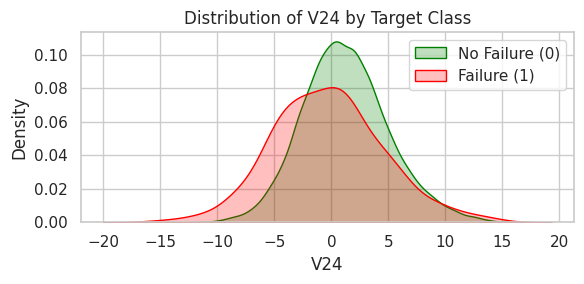

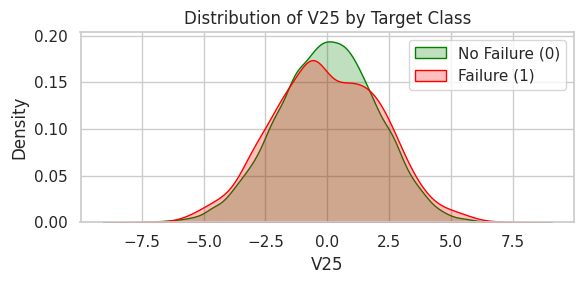

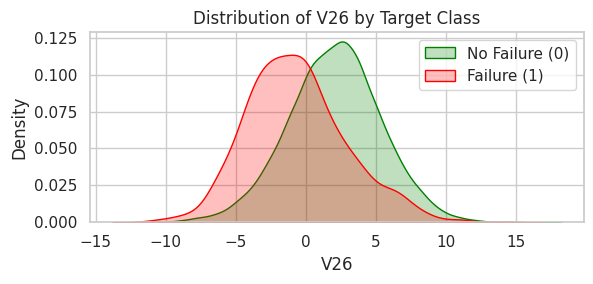

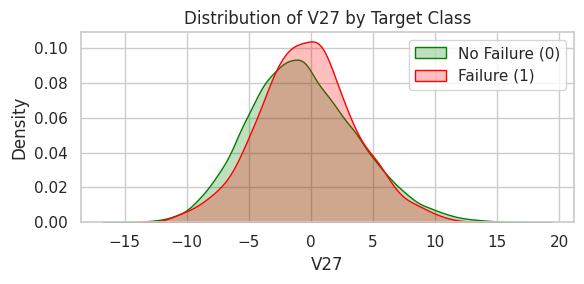

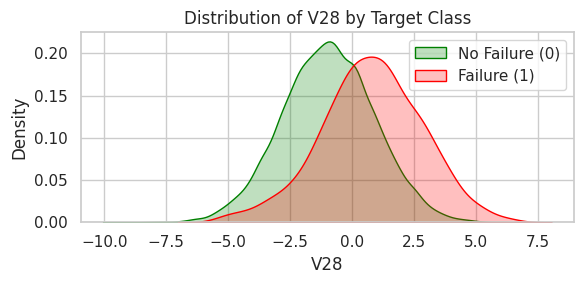

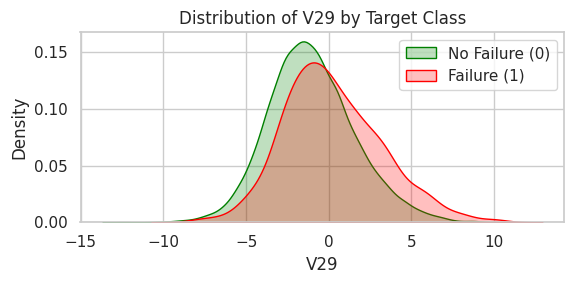

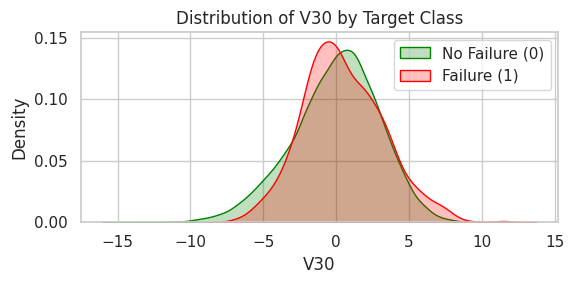

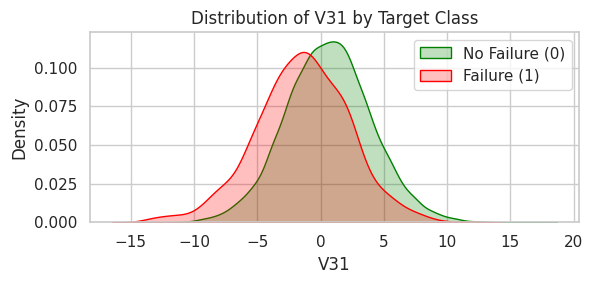

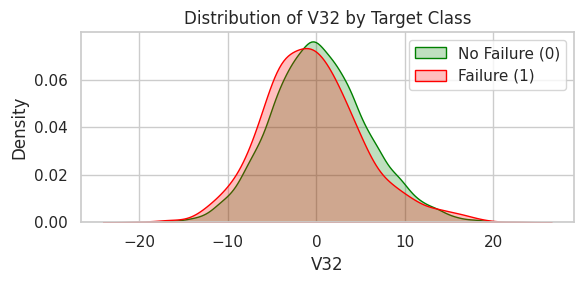

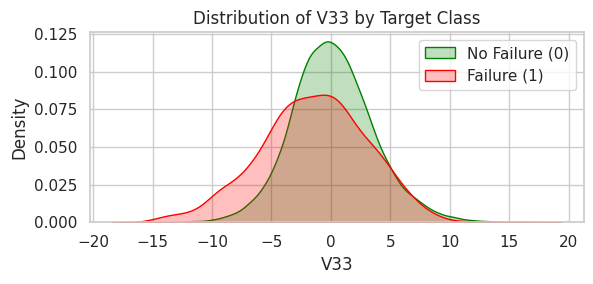

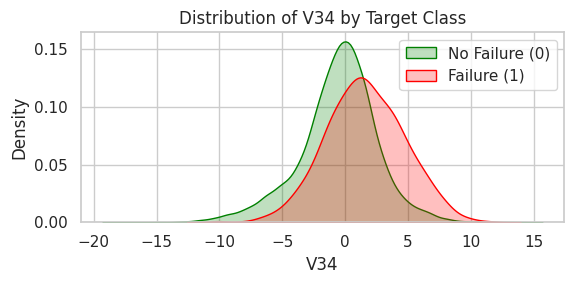

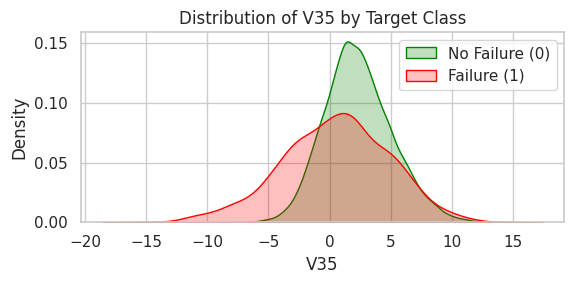

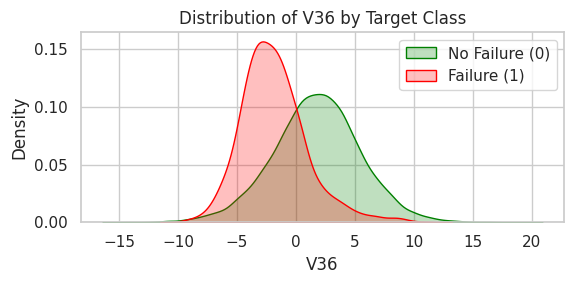

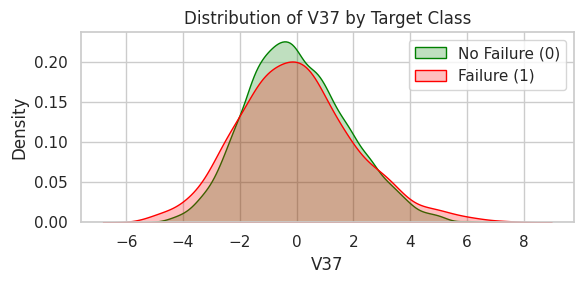

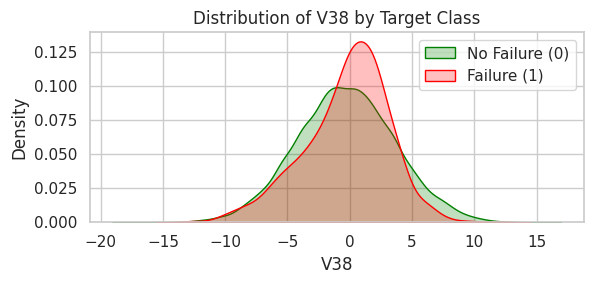

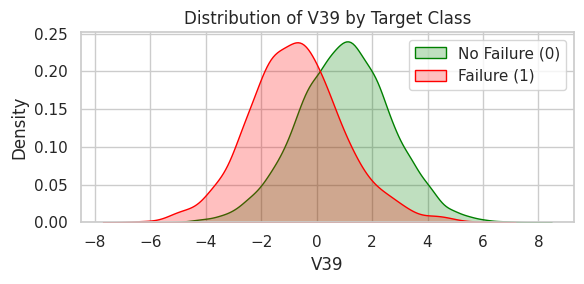

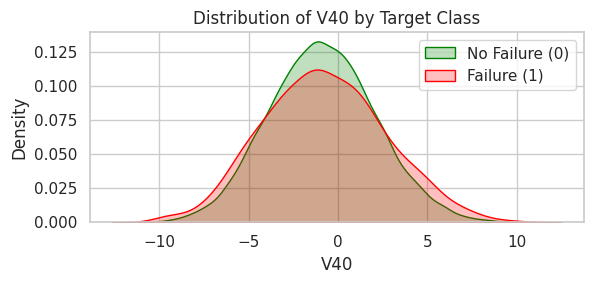

> # Strong Separation<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Strong-Separation"
> class="anchor-link">¶</a>
>
> ### These features show clear distribution differences between Target = 0 and Target = 1. They are highly predictive and should be prioritized in modeling.<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#These-features-show-clear-distribution-differences-between-Target-=-0-and-Target-=-1.-They-are-highly-predictive-and-should-be-prioritized-in-modeling."
> class="anchor-link">¶</a>
>
> -   V3
> -   V12
> -   V14
> -   V35
> -   V38
>
> ### Why they matter:<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Why-they-matter:"
> class="anchor-link">¶</a>
>
> -   Their values shift noticeably between failure and non-failure
>     cases.
> -   They may show different peaks, spreads, or outlier patterns for
>     each class
>
> # Moderate Separation<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Moderate-Separation"
> class="anchor-link">¶</a>
>
> ### These features show some difference between the two target classes, but not sharply. They may still help the model when combined with others.<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#These-features-show-some-difference-between-the-two-target-classes,-but-not-sharply.-They-may-still-help-the-model-when-combined-with-others."
> class="anchor-link">¶</a>
>
> -   V1, V2, V4, V6, V8
> -   V18, V32, V33, V34, V36, V39, V40
>
> ### Why they matter:<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Why-they-matter:"
> class="anchor-link">¶</a>
>
> -   They may show wider spread or subtle shifts in mean/median between
>     classes.
> -   Useful in nonlinear models like neural networks.
>
> ### Weak Separation<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Weak-Separation"
> class="anchor-link">¶</a>
>
> ### These features show similar distributions for both Target = 0 and Target = 1. They are less informative and may be dropped or deprioritized.<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#These-features-show-similar-distributions-for-both-Target-=-0-and-Target-=-1.-They-are-less-informative-and-may-be-dropped-or-deprioritized."
> class="anchor-link">¶</a>
>
> -   V5, V7, V9, V10, V11, V13
> -   V15 to V31
> -   V37
>
> ### Why they matter:<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Why-they-matter:"
> class="anchor-link">¶</a>
>
> -   Their distributions overlap heavily between classes.
> -   They may add noise or redundancy unless combined cleverly.

In \[17\]:

    # Boxplots: feature vs Target
    for col in features:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x='Target', y=col, data=df, palette='Set2')
        plt.title(f'{col} by Failure Status')
        plt.xlabel('Target (0 = No Failure, 1 = Failure)')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

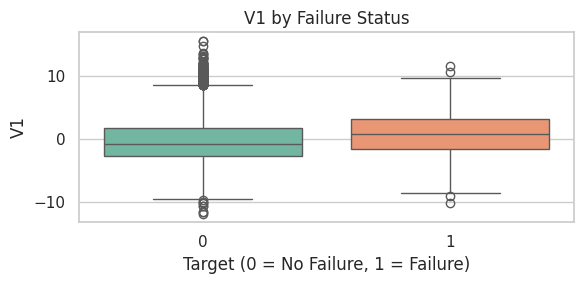

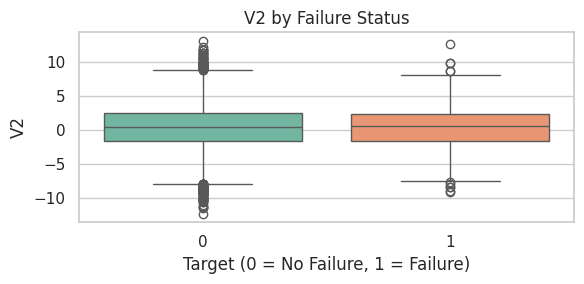

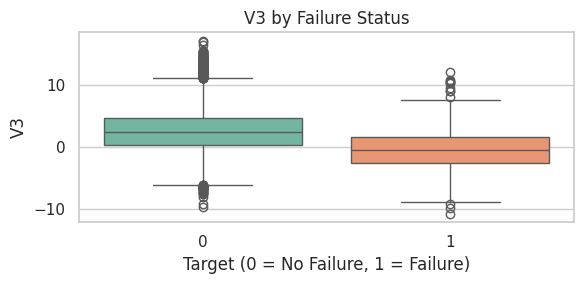

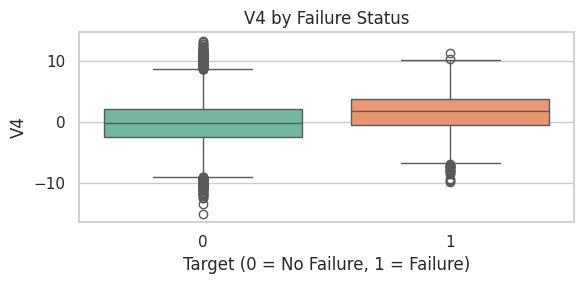

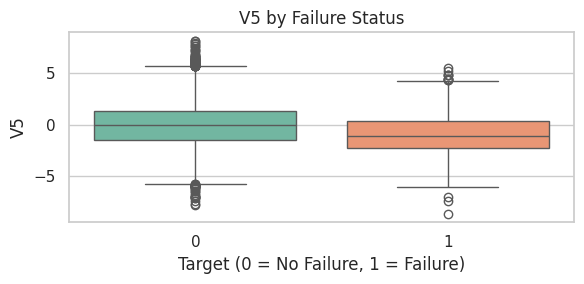

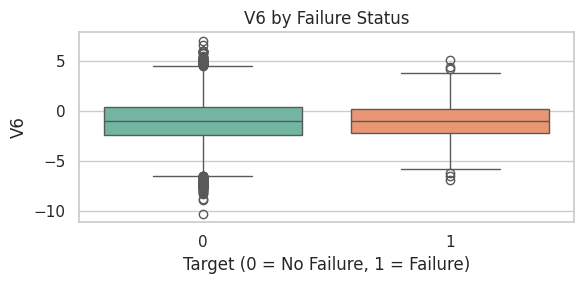

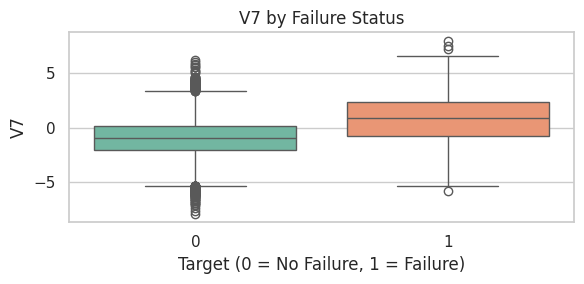

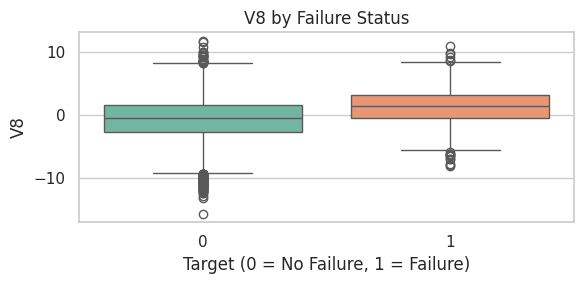

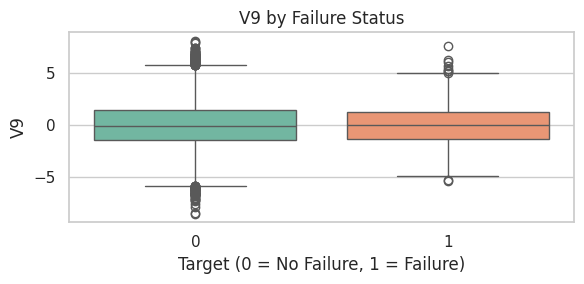

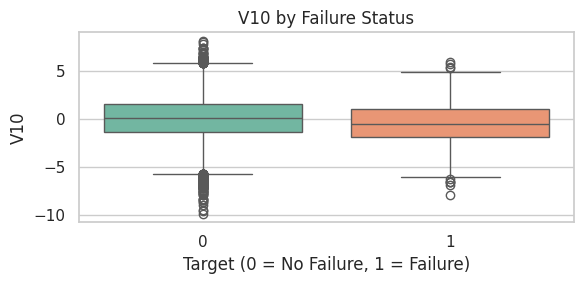

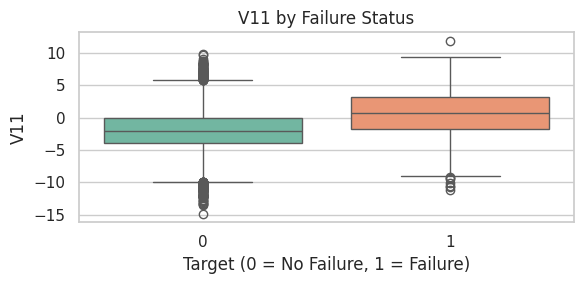

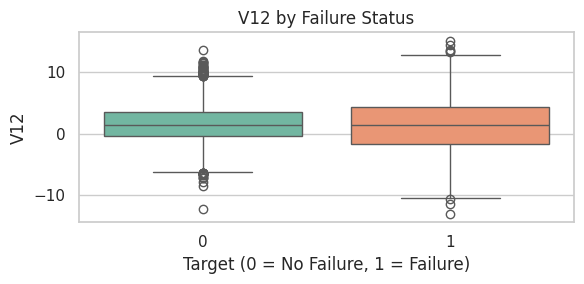

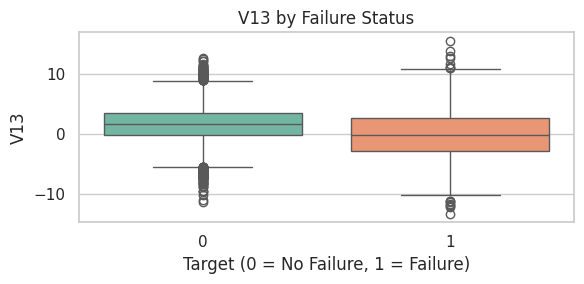

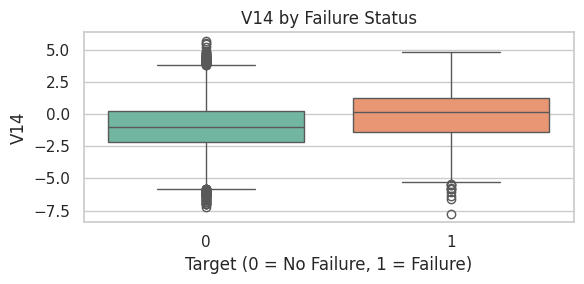

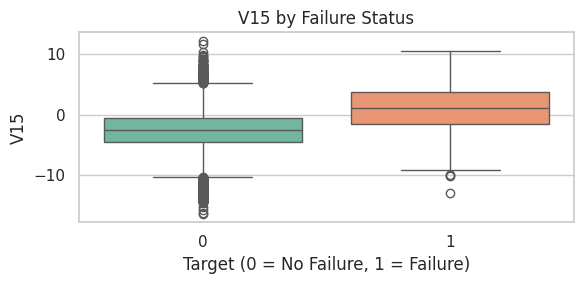

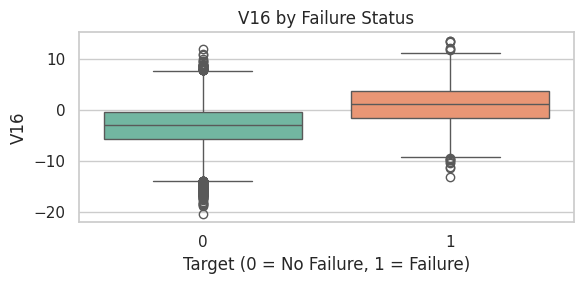

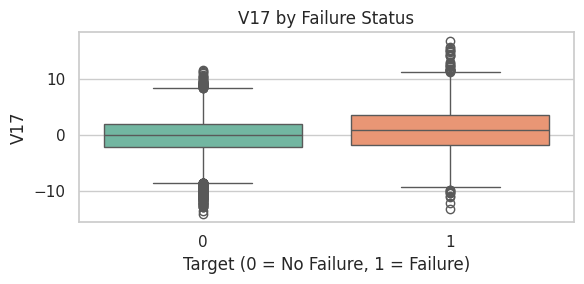

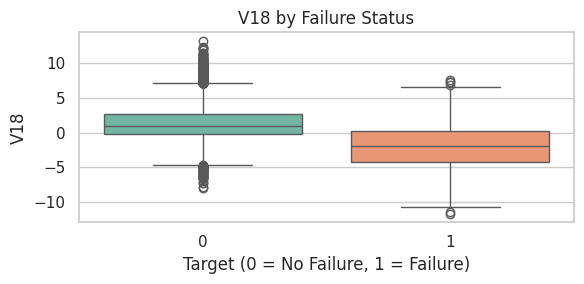

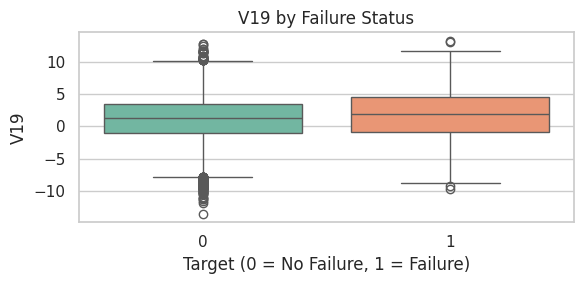

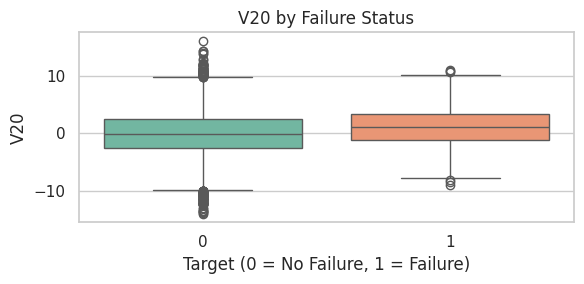

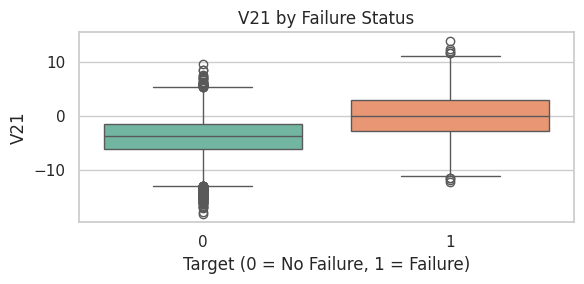

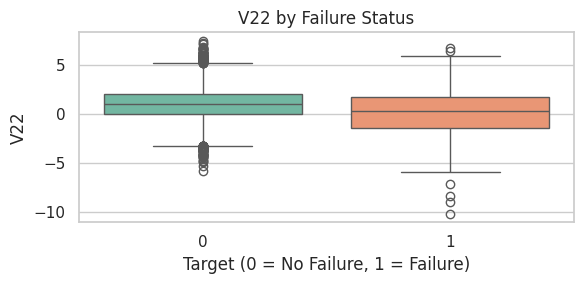

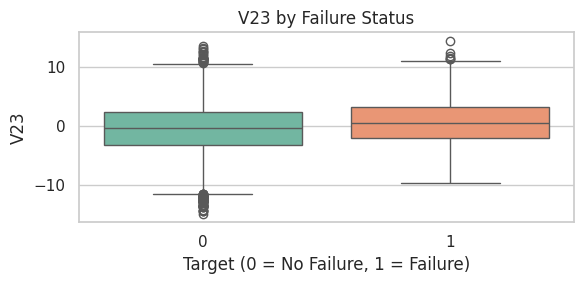

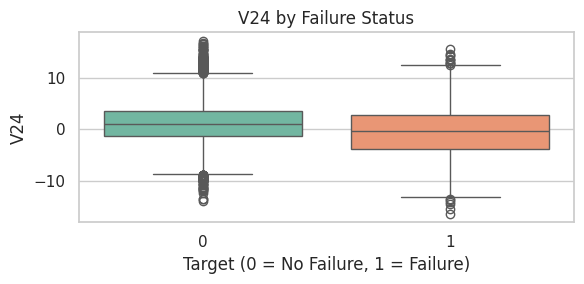

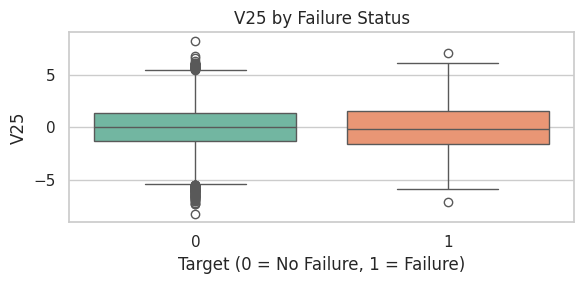

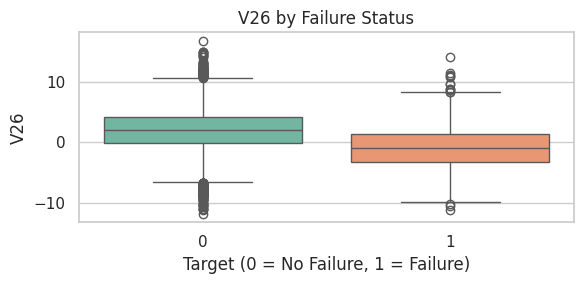

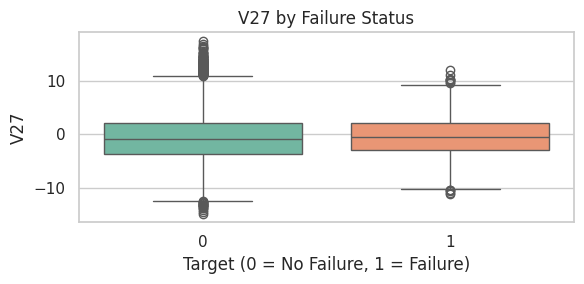

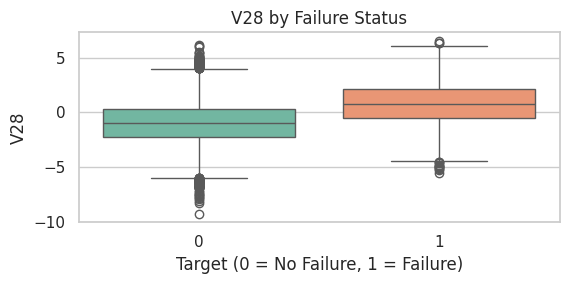

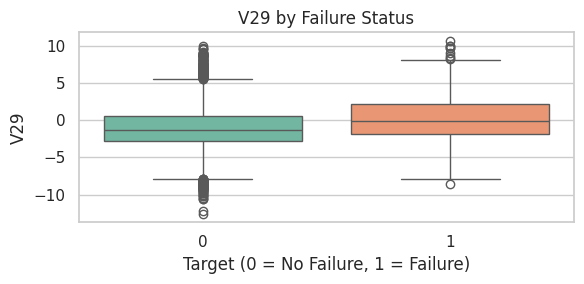

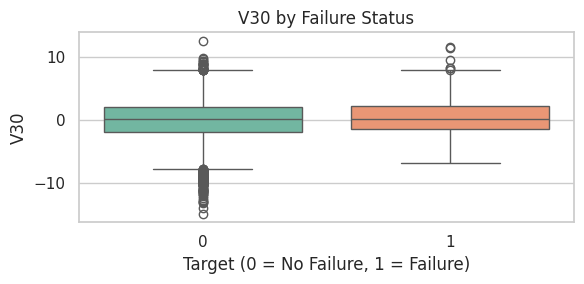

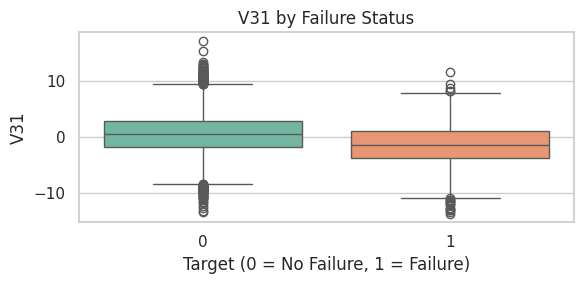

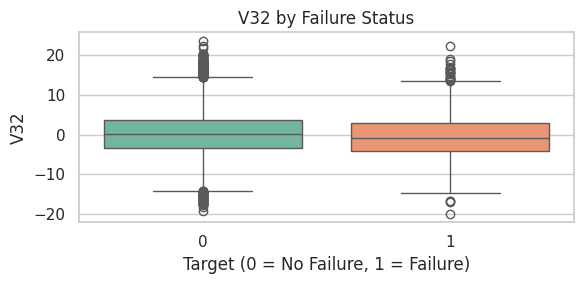

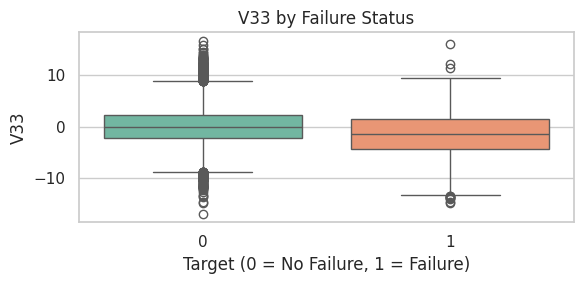

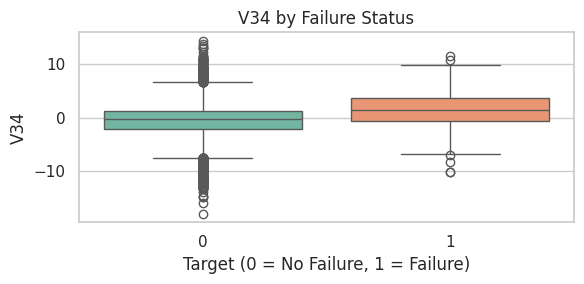

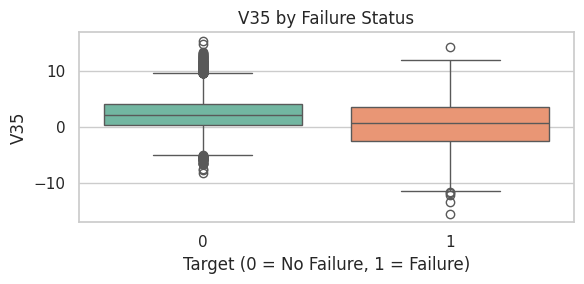

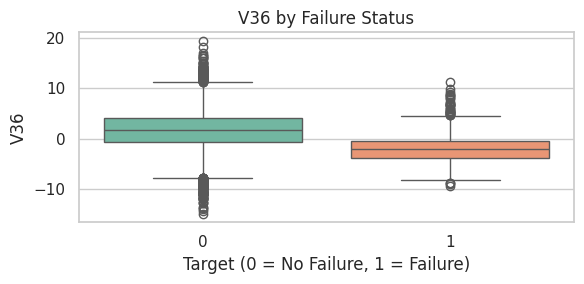

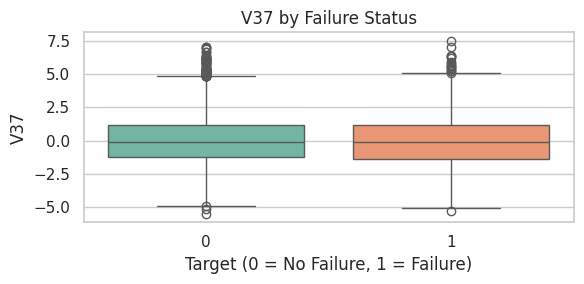

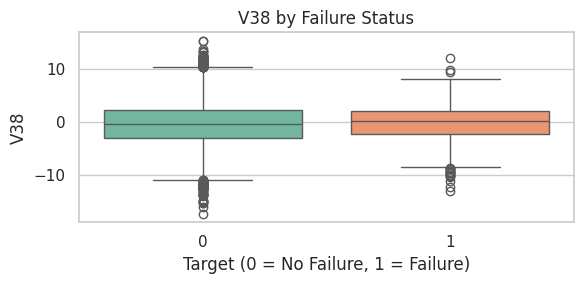

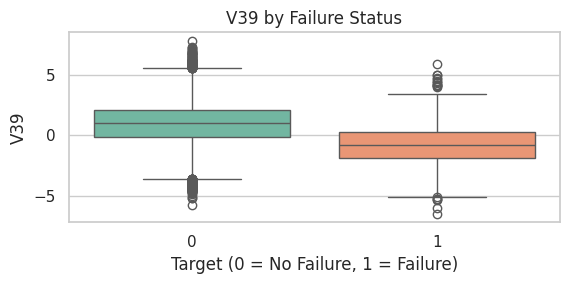

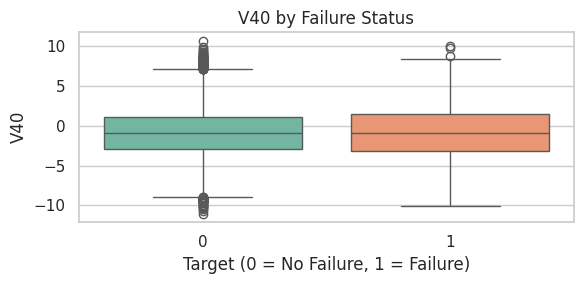

> # Strong Target Separation<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Strong-Target-Separation"
> class="anchor-link">¶</a>
>
> These features show clear shifts in median or spread between failure
> and non-failure cases:
>
> -   V3: Higher median for failures; wide spread with visible outliers
>     → strong predictor
> -   V12: Lower median for failures; compact spread for Target = 0,
>     wider for Target = 1
> -   V14: Similar to V12; failures show more variability
> -   V35: Failures have higher values and more outliers → strong signal
> -   V38: Failures skew lower; clear separation in box height Outliers:
>     Present in both classes, but more frequent and extreme in Target =
>     1
>
> # Moderate Separation<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Moderate-Separation"
> class="anchor-link">¶</a>
>
> These features show some difference, often in spread or outlier
> behavior:
>
> -   V1, V2: Slight shift in median; failures show more spread
> -   V4, V6, V8: Wider boxes for failures; some outlier clusters
> -   V32, V33, V34, V36, V39, V40: Failures show more variability and
>     outliers Outliers: Often concentrated in the failure class,
>     suggesting sensor spikes or anomalies
>
> # Weak Separation<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Weak-Separation"
> class="anchor-link">¶</a>
>
> These features show similar box plots for both classes — little to no
> difference in median or spread:
>
> -   V5, V7, V9-V11, V13, V15-V31, V37 Outliers: Present but evenly
>     distributed across both classes; may reflect noise or low signal
>
> # Outlier Behavior Summary<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Outlier-Behavior-Summary"
> class="anchor-link">¶</a>
>
> -   Frequent outliers: V3, V35, V38, V32, V36
> -   Failure-specific outliers: Often seen in Target = 1 for V12, V14,
>     V33, V34
> -   Symmetric outliers: Found in V5, V10, V20 — likely noise

In \[18\]:

    # correlation matrix
    plt.figure(figsize=(12, 10))
    corr = df[features].corr()
    sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.5})
    plt.title('Feature Correlation Matrix')
    plt.show()

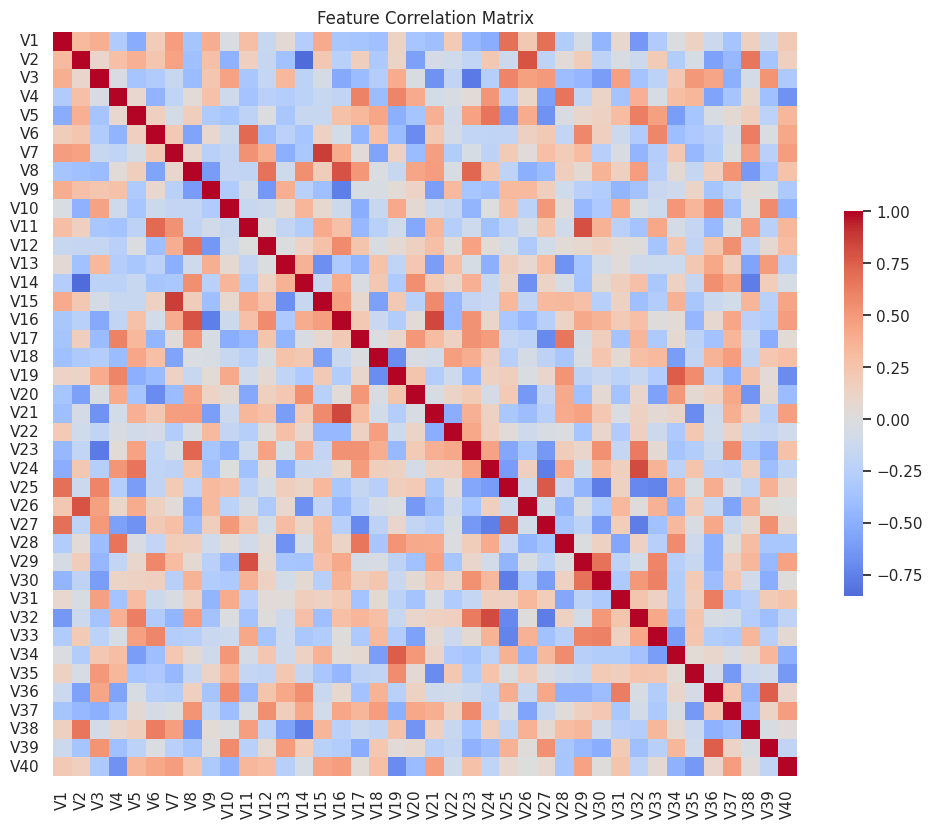

> # Strong Positive Correlations (r \> 0.75)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Strong-Positive-Correlations-(r-%3E-0.75)"
> class="anchor-link">¶</a>
>
> These feature pairs move together — when one increases, the other
> tends to increase too:
>
> -   V12 and V14
> -   V35 and V36
> -   V3 and V38 -Implication: These may be redundant. You can consider
>     dropping one or combining them via PCA or feature averaging.
>
> # Strong Negative Correlations (r \< -0.5)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Strong-Negative-Correlations-(r-%3C--0.5)"
> class="anchor-link">¶</a>
>
> These features move in opposite directions:
>
> -   V6 and V40
> -   V8 and V34
> -   Implication: These may capture complementary behaviors — useful
>     for modeling nonlinear interactions.
>
> # Weak or No Correlation (r ≈ 0)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Weak-or-No-Correlation-(r-%E2%89%88-0)"
> class="anchor-link">¶</a>
>
> Many features show low correlation with others:
>
> -   V22 to V31 are mostly uncorrelated with the rest Implication:
>     These may add unique signal or noise. Evaluate their predictive
>     power individually.

In \[19\]:

    #correlation with target
    cor_target = df.corr()['Target'].drop('Target').sort_values(ascending=False)
    print("Top positively correlated features with failure:")
    print(cor_target.head(10))

    print("\nTop negatively correlated features with failure:")
    print(cor_target.tail(10))

    Top positively correlated features with failure:
    V21    0.256411
    V15    0.249118
    V7     0.236907
    V16    0.230507
    V28    0.207359
    V11    0.196715
    V34    0.153854
    V8     0.135996
    V14    0.117586
    V4     0.110786
    Name: Target, dtype: float64

    Top negatively correlated features with failure:
    V33   -0.102548
    V22   -0.134727
    V31   -0.136951
    V13   -0.139718
    V35   -0.145603
    V26   -0.180469
    V3    -0.213855
    V36   -0.216453
    V39   -0.227264
    V18   -0.293340
    Name: Target, dtype: float64

In \[21\]:

    #Split features and target on training data
    X_train = df.drop(columns=['Target'])
    y_train = df['Target']

In \[22\]:

    # Impute missing values in V1 and V2 using training medians
    for col in ['V1', 'V2']:
        median = X_train[col].median()
        X_train[col].fillna(median, inplace=True)

In \[23\]:

    # handling outlires in training data
    def winsorize(df, lower=0.01, upper=0.99):
        df_clipped = df.copy()
        for col in df.columns:
            low = np.percentile(df[col], lower * 100)
            high = np.percentile(df[col], upper * 100)
            df_clipped[col] = np.clip(df[col], low, high)
        return df_clipped

    X_train = winsorize(X_train)

In \[27\]:

    #feature scaling on training data
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)

In \[30\]:

    #target column balancing using smote on training data
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In \[31\]:

    #  Copy test data
    X_test = df1.copy()

In \[37\]:

    # Use the same medians learned from testing data
    #missing values treatment on testing data
    for col in ['V1', 'V2']:
        X_test[col].fillna(df[col].median(), inplace=True)

In \[38\]:

    # Step 1: Drop 'Target' if present in df1
    X_test = df1.drop(columns=['Target'], errors='ignore')  # Safe even if 'Target' is missing

    # Step 2: Apply missing value treatment
    for col in ['V1', 'V2']:
        X_test[col].fillna(X_train[col].median(), inplace=True)

    # Step 3: Apply winsorization using training thresholds
    X_test = winsorize_with_reference(X_test, reference=X_train)

    # Step 4: Apply scaling using training scaler
    X_test_scaled = scaler.transform(X_test)

> # Metric of Choice: F1 Score<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Metric-of-Choice:-F1-Score"
> class="anchor-link">¶</a>
>
> Why F1 Score?
>
> -   Dataset is imbalanced (only \~5.5% failures)
> -   Accuracy would be misleading — it could be high even if the model
>     misses all failures
> -   F1 Score balances precision and recall, making it ideal for rare
>     event detection like turbine failures

In \[42\]:

    # Step 1: Define model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Step 2: Compile with SGD optimizer
    sgd = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=sgd,
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])

    # Step 3: Train the model
    history = model.fit(X_train_bal, y_train_bal, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    Epoch 1/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8552 - loss: 0.3434 - precision: 0.8248 - recall: 0.7946 - val_accuracy: 0.9034 - val_loss: 0.2976 - val_precision: 1.0000 - val_recall: 0.9034
    Epoch 2/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9438 - loss: 0.1839 - precision: 0.9642 - recall: 0.8831 - val_accuracy: 0.9075 - val_loss: 0.2749 - val_precision: 1.0000 - val_recall: 0.9075
    Epoch 3/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9527 - loss: 0.1654 - precision: 0.9765 - recall: 0.8957 - val_accuracy: 0.9144 - val_loss: 0.2298 - val_precision: 1.0000 - val_recall: 0.9144
    Epoch 4/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9603 - loss: 0.1444 - precision: 0.9850 - recall: 0.9085 - val_accuracy: 0.9140 - val_loss: 0.2311 - val_precision: 1.0000 - val_recall: 0.9140
    Epoch 5/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9604 - loss: 0.1357 - precision: 0.9845 - recall: 0.9094 - val_accuracy: 0.9179 - val_loss: 0.2205 - val_precision: 1.0000 - val_recall: 0.9179
    Epoch 6/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9625 - loss: 0.1275 - precision: 0.9844 - recall: 0.9144 - val_accuracy: 0.9202 - val_loss: 0.2062 - val_precision: 1.0000 - val_recall: 0.9202
    Epoch 7/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9629 - loss: 0.1276 - precision: 0.9864 - recall: 0.9128 - val_accuracy: 0.9223 - val_loss: 0.1946 - val_precision: 1.0000 - val_recall: 0.9223
    Epoch 8/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9643 - loss: 0.1264 - precision: 0.9866 - recall: 0.9171 - val_accuracy: 0.9224 - val_loss: 0.1875 - val_precision: 1.0000 - val_recall: 0.9224
    Epoch 9/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9634 - loss: 0.1249 - precision: 0.9846 - recall: 0.9154 - val_accuracy: 0.9206 - val_loss: 0.1925 - val_precision: 1.0000 - val_recall: 0.9206
    Epoch 10/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9667 - loss: 0.1121 - precision: 0.9872 - recall: 0.9239 - val_accuracy: 0.9222 - val_loss: 0.1882 - val_precision: 1.0000 - val_recall: 0.9222
    Epoch 11/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9676 - loss: 0.1128 - precision: 0.9892 - recall: 0.9237 - val_accuracy: 0.9227 - val_loss: 0.1878 - val_precision: 1.0000 - val_recall: 0.9227
    Epoch 12/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9680 - loss: 0.1125 - precision: 0.9893 - recall: 0.9233 - val_accuracy: 0.9165 - val_loss: 0.2009 - val_precision: 1.0000 - val_recall: 0.9165
    Epoch 13/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9655 - loss: 0.1171 - precision: 0.9892 - recall: 0.9177 - val_accuracy: 0.9244 - val_loss: 0.1871 - val_precision: 1.0000 - val_recall: 0.9244
    Epoch 14/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9671 - loss: 0.1098 - precision: 0.9881 - recall: 0.9229 - val_accuracy: 0.9232 - val_loss: 0.1873 - val_precision: 1.0000 - val_recall: 0.9232
    Epoch 15/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9677 - loss: 0.1103 - precision: 0.9896 - recall: 0.9237 - val_accuracy: 0.9243 - val_loss: 0.1771 - val_precision: 1.0000 - val_recall: 0.9243
    Epoch 16/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9686 - loss: 0.1067 - precision: 0.9866 - recall: 0.9292 - val_accuracy: 0.9251 - val_loss: 0.1737 - val_precision: 1.0000 - val_recall: 0.9251
    Epoch 17/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9698 - loss: 0.1028 - precision: 0.9896 - recall: 0.9299 - val_accuracy: 0.9238 - val_loss: 0.1798 - val_precision: 1.0000 - val_recall: 0.9238
    Epoch 18/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9698 - loss: 0.1046 - precision: 0.9922 - recall: 0.9273 - val_accuracy: 0.9223 - val_loss: 0.1907 - val_precision: 1.0000 - val_recall: 0.9223
    Epoch 19/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9684 - loss: 0.1057 - precision: 0.9889 - recall: 0.9269 - val_accuracy: 0.9232 - val_loss: 0.1764 - val_precision: 1.0000 - val_recall: 0.9232
    Epoch 20/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9669 - loss: 0.1086 - precision: 0.9879 - recall: 0.9228 - val_accuracy: 0.9267 - val_loss: 0.1698 - val_precision: 1.0000 - val_recall: 0.9267
    Epoch 21/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9676 - loss: 0.1070 - precision: 0.9901 - recall: 0.9235 - val_accuracy: 0.9263 - val_loss: 0.1666 - val_precision: 1.0000 - val_recall: 0.9263
    Epoch 22/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9673 - loss: 0.1071 - precision: 0.9881 - recall: 0.9241 - val_accuracy: 0.9269 - val_loss: 0.1716 - val_precision: 1.0000 - val_recall: 0.9269
    Epoch 23/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9690 - loss: 0.1044 - precision: 0.9881 - recall: 0.9276 - val_accuracy: 0.9211 - val_loss: 0.1809 - val_precision: 1.0000 - val_recall: 0.9211
    Epoch 24/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9686 - loss: 0.1050 - precision: 0.9902 - recall: 0.9256 - val_accuracy: 0.9255 - val_loss: 0.1647 - val_precision: 1.0000 - val_recall: 0.9255
    Epoch 25/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9686 - loss: 0.1037 - precision: 0.9879 - recall: 0.9289 - val_accuracy: 0.9288 - val_loss: 0.1569 - val_precision: 1.0000 - val_recall: 0.9288
    Epoch 26/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9697 - loss: 0.0990 - precision: 0.9889 - recall: 0.9291 - val_accuracy: 0.9262 - val_loss: 0.1640 - val_precision: 1.0000 - val_recall: 0.9262
    Epoch 27/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9698 - loss: 0.1011 - precision: 0.9890 - recall: 0.9299 - val_accuracy: 0.9277 - val_loss: 0.1491 - val_precision: 1.0000 - val_recall: 0.9277
    Epoch 28/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9684 - loss: 0.1021 - precision: 0.9860 - recall: 0.9281 - val_accuracy: 0.9259 - val_loss: 0.1524 - val_precision: 1.0000 - val_recall: 0.9259
    Epoch 29/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.1005 - precision: 0.9880 - recall: 0.9272 - val_accuracy: 0.9293 - val_loss: 0.1569 - val_precision: 1.0000 - val_recall: 0.9293
    Epoch 30/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9678 - loss: 0.1016 - precision: 0.9873 - recall: 0.9251 - val_accuracy: 0.9288 - val_loss: 0.1549 - val_precision: 1.0000 - val_recall: 0.9288
    Epoch 31/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9698 - loss: 0.0963 - precision: 0.9882 - recall: 0.9308 - val_accuracy: 0.9308 - val_loss: 0.1423 - val_precision: 1.0000 - val_recall: 0.9308
    Epoch 32/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.0990 - precision: 0.9861 - recall: 0.9295 - val_accuracy: 0.9251 - val_loss: 0.1562 - val_precision: 1.0000 - val_recall: 0.9251
    Epoch 33/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9701 - loss: 0.0958 - precision: 0.9897 - recall: 0.9289 - val_accuracy: 0.9332 - val_loss: 0.1344 - val_precision: 1.0000 - val_recall: 0.9332
    Epoch 34/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9687 - loss: 0.1007 - precision: 0.9850 - recall: 0.9318 - val_accuracy: 0.9289 - val_loss: 0.1502 - val_precision: 1.0000 - val_recall: 0.9289
    Epoch 35/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9702 - loss: 0.0937 - precision: 0.9892 - recall: 0.9316 - val_accuracy: 0.9304 - val_loss: 0.1445 - val_precision: 1.0000 - val_recall: 0.9304
    Epoch 36/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9717 - loss: 0.0964 - precision: 0.9885 - recall: 0.9358 - val_accuracy: 0.9325 - val_loss: 0.1381 - val_precision: 1.0000 - val_recall: 0.9325
    Epoch 37/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9690 - loss: 0.0929 - precision: 0.9865 - recall: 0.9307 - val_accuracy: 0.9264 - val_loss: 0.1659 - val_precision: 1.0000 - val_recall: 0.9264
    Epoch 38/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9712 - loss: 0.0911 - precision: 0.9895 - recall: 0.9333 - val_accuracy: 0.9340 - val_loss: 0.1353 - val_precision: 1.0000 - val_recall: 0.9340
    Epoch 39/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9690 - loss: 0.0985 - precision: 0.9855 - recall: 0.9308 - val_accuracy: 0.9291 - val_loss: 0.1552 - val_precision: 1.0000 - val_recall: 0.9291
    Epoch 40/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9719 - loss: 0.0911 - precision: 0.9897 - recall: 0.9349 - val_accuracy: 0.9330 - val_loss: 0.1373 - val_precision: 1.0000 - val_recall: 0.9330
    Epoch 41/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9712 - loss: 0.0946 - precision: 0.9885 - recall: 0.9345 - val_accuracy: 0.9281 - val_loss: 0.1527 - val_precision: 1.0000 - val_recall: 0.9281
    Epoch 42/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9715 - loss: 0.0905 - precision: 0.9903 - recall: 0.9344 - val_accuracy: 0.9329 - val_loss: 0.1411 - val_precision: 1.0000 - val_recall: 0.9329
    Epoch 43/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9704 - loss: 0.0888 - precision: 0.9860 - recall: 0.9346 - val_accuracy: 0.9324 - val_loss: 0.1420 - val_precision: 1.0000 - val_recall: 0.9324
    Epoch 44/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9718 - loss: 0.0948 - precision: 0.9895 - recall: 0.9341 - val_accuracy: 0.9305 - val_loss: 0.1437 - val_precision: 1.0000 - val_recall: 0.9305
    Epoch 45/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9718 - loss: 0.0893 - precision: 0.9892 - recall: 0.9334 - val_accuracy: 0.9326 - val_loss: 0.1372 - val_precision: 1.0000 - val_recall: 0.9326
    Epoch 46/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9710 - loss: 0.0897 - precision: 0.9879 - recall: 0.9342 - val_accuracy: 0.9359 - val_loss: 0.1303 - val_precision: 1.0000 - val_recall: 0.9359
    Epoch 47/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9721 - loss: 0.0899 - precision: 0.9884 - recall: 0.9361 - val_accuracy: 0.9307 - val_loss: 0.1494 - val_precision: 1.0000 - val_recall: 0.9307
    Epoch 48/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9719 - loss: 0.0908 - precision: 0.9879 - recall: 0.9374 - val_accuracy: 0.9379 - val_loss: 0.1293 - val_precision: 1.0000 - val_recall: 0.9379
    Epoch 49/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9712 - loss: 0.0921 - precision: 0.9865 - recall: 0.9359 - val_accuracy: 0.9321 - val_loss: 0.1414 - val_precision: 1.0000 - val_recall: 0.9321
    Epoch 50/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9698 - loss: 0.0944 - precision: 0.9857 - recall: 0.9344 - val_accuracy: 0.9345 - val_loss: 0.1292 - val_precision: 1.0000 - val_recall: 0.9345

> # Training Metrics (Epoch 50)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Training-Metrics-(Epoch-50)"
> class="anchor-link">¶</a>
>
> -   Accuracy: 96.98%
> -   Loss: 0.0944
> -   Precision: 98.57%
> -   Recall: 93.44% \# Validation Metrics (Epoch 50)
> -   Accuracy: 93.45%
> -   Loss: 0.1292
> -   Precision: 100.00%
> -   Recall: 93.45%
> -   High precision and recall on both training and validation sets
>     confirm that the model is:
> -   Confident in its predictions (precision)
> -   Sensitive to actual failures (recall)
> -   Validation metrics closely track training metrics, suggesting:
> -   No overfitting
> -   Strong generalization
> -   Loss is low and stable, indicating convergence

In \[46\]:

    # Extract target from df1
    y_test = df1['Target']

    # Drop target column to get test features
    X_test = df1.drop(columns=['Target'])

In \[47\]:

    # Predict on scaled test data
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Classification report
    from sklearn.metrics import f1_score, confusion_matrix, classification_report

    print(classification_report(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
                  precision    recall  f1-score   support

               0       0.99      1.00      0.99      4718
               1       0.93      0.87      0.90       282

        accuracy                           0.99      5000
       macro avg       0.96      0.93      0.95      5000
    weighted avg       0.99      0.99      0.99      5000

    F1 Score: 0.8987108655616943
    Confusion Matrix:
     [[4701   17]
     [  38  244]]

-   Accuracy: 99%
-   Macro F1 Score: 0.95
-   Weighted F1 Score: 0.99
-   True Negatives: 4701
-   False Positives: 17
-   False Negatives: 38
-   True Positives: 244
-   High precision (0.93) for failures: very few false alarms
-   Strong recall (0.87): most actual failures are detected
-   Balanced F1 score (0.90): confirms good trade-off between precision
    and recall
-   Low false positives (17) and low false negatives (38) — excellent
    for reliability

In \[49\]:

    model_1 = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model_1.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    model_1.fit(X_train_bal, y_train_bal, epochs=50, batch_size=32, validation_split=0.2)

    y_pred_1 = (model_1.predict(X_test) > 0.5).astype(int)
    print("\n📊 Model 1: Baseline (SGD, 2 layers)")
    print(classification_report(y_test, y_pred_1))
    print("F1 Score:", f1_score(y_test, y_pred_1))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_1))

    Epoch 1/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8047 - loss: 0.4751 - val_accuracy: 0.8841 - val_loss: 0.3693
    Epoch 2/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9322 - loss: 0.2258 - val_accuracy: 0.8937 - val_loss: 0.3256
    Epoch 3/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9474 - loss: 0.1890 - val_accuracy: 0.9007 - val_loss: 0.2989
    Epoch 4/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9525 - loss: 0.1712 - val_accuracy: 0.9084 - val_loss: 0.2737
    Epoch 5/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9581 - loss: 0.1576 - val_accuracy: 0.9116 - val_loss: 0.2548
    Epoch 6/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9590 - loss: 0.1551 - val_accuracy: 0.9117 - val_loss: 0.2555
    Epoch 7/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9605 - loss: 0.1458 - val_accuracy: 0.9087 - val_loss: 0.2633
    Epoch 8/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9622 - loss: 0.1353 - val_accuracy: 0.9089 - val_loss: 0.2548
    Epoch 9/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9638 - loss: 0.1326 - val_accuracy: 0.9121 - val_loss: 0.2491
    Epoch 10/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9614 - loss: 0.1352 - val_accuracy: 0.9137 - val_loss: 0.2374
    Epoch 11/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9670 - loss: 0.1209 - val_accuracy: 0.9156 - val_loss: 0.2257
    Epoch 12/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9643 - loss: 0.1250 - val_accuracy: 0.9175 - val_loss: 0.2164
    Epoch 13/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9666 - loss: 0.1197 - val_accuracy: 0.9154 - val_loss: 0.2265
    Epoch 14/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9648 - loss: 0.1220 - val_accuracy: 0.9179 - val_loss: 0.2192
    Epoch 15/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9667 - loss: 0.1154 - val_accuracy: 0.9183 - val_loss: 0.2150
    Epoch 16/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9678 - loss: 0.1094 - val_accuracy: 0.9211 - val_loss: 0.2022
    Epoch 17/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9651 - loss: 0.1178 - val_accuracy: 0.9190 - val_loss: 0.2148
    Epoch 18/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9685 - loss: 0.1063 - val_accuracy: 0.9213 - val_loss: 0.2017
    Epoch 19/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.1076 - val_accuracy: 0.9199 - val_loss: 0.2131
    Epoch 20/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9675 - loss: 0.1083 - val_accuracy: 0.9214 - val_loss: 0.1985
    Epoch 21/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9685 - loss: 0.1037 - val_accuracy: 0.9215 - val_loss: 0.1893
    Epoch 22/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9682 - loss: 0.1016 - val_accuracy: 0.9218 - val_loss: 0.1917
    Epoch 23/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9708 - loss: 0.0957 - val_accuracy: 0.9234 - val_loss: 0.1822
    Epoch 24/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9699 - loss: 0.0974 - val_accuracy: 0.9217 - val_loss: 0.1883
    Epoch 25/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9673 - loss: 0.1013 - val_accuracy: 0.9248 - val_loss: 0.1733
    Epoch 26/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9670 - loss: 0.1030 - val_accuracy: 0.9226 - val_loss: 0.1800
    Epoch 27/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9701 - loss: 0.0942 - val_accuracy: 0.9243 - val_loss: 0.1653
    Epoch 28/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9695 - loss: 0.0927 - val_accuracy: 0.9230 - val_loss: 0.1723
    Epoch 29/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9702 - loss: 0.0901 - val_accuracy: 0.9259 - val_loss: 0.1671
    Epoch 30/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9687 - loss: 0.0940 - val_accuracy: 0.9220 - val_loss: 0.1830
    Epoch 31/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9712 - loss: 0.0856 - val_accuracy: 0.9289 - val_loss: 0.1513
    Epoch 32/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9728 - loss: 0.0827 - val_accuracy: 0.9273 - val_loss: 0.1614
    Epoch 33/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9725 - loss: 0.0815 - val_accuracy: 0.9264 - val_loss: 0.1632
    Epoch 34/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9716 - loss: 0.0830 - val_accuracy: 0.9289 - val_loss: 0.1537
    Epoch 35/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9718 - loss: 0.0820 - val_accuracy: 0.9310 - val_loss: 0.1511
    Epoch 36/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9726 - loss: 0.0807 - val_accuracy: 0.9293 - val_loss: 0.1511
    Epoch 37/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9728 - loss: 0.0798 - val_accuracy: 0.9303 - val_loss: 0.1502
    Epoch 38/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9729 - loss: 0.0795 - val_accuracy: 0.9312 - val_loss: 0.1425
    Epoch 39/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9749 - loss: 0.0743 - val_accuracy: 0.9304 - val_loss: 0.1501
    Epoch 40/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9727 - loss: 0.0778 - val_accuracy: 0.9309 - val_loss: 0.1481
    Epoch 41/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9725 - loss: 0.0804 - val_accuracy: 0.9320 - val_loss: 0.1475
    Epoch 42/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9730 - loss: 0.0754 - val_accuracy: 0.9303 - val_loss: 0.1538
    Epoch 43/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9735 - loss: 0.0746 - val_accuracy: 0.9318 - val_loss: 0.1477
    Epoch 44/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9747 - loss: 0.0731 - val_accuracy: 0.9352 - val_loss: 0.1392
    Epoch 45/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9764 - loss: 0.0702 - val_accuracy: 0.9374 - val_loss: 0.1291
    Epoch 46/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9763 - loss: 0.0676 - val_accuracy: 0.9338 - val_loss: 0.1380
    Epoch 47/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9746 - loss: 0.0717 - val_accuracy: 0.9357 - val_loss: 0.1302
    Epoch 48/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9749 - loss: 0.0704 - val_accuracy: 0.9359 - val_loss: 0.1371
    Epoch 49/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9755 - loss: 0.0693 - val_accuracy: 0.9403 - val_loss: 0.1203
    Epoch 50/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9750 - loss: 0.0713 - val_accuracy: 0.9406 - val_loss: 0.1245
    157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

    📊 Model 1: Baseline (SGD, 2 layers)
                  precision    recall  f1-score   support

               0       0.99      0.91      0.95      4718
               1       0.35      0.79      0.48       282

        accuracy                           0.90      5000
       macro avg       0.67      0.85      0.72      5000
    weighted avg       0.95      0.90      0.92      5000

    F1 Score: 0.48268398268398266
    Confusion Matrix:
     [[4299  419]
     [  59  223]]

In \[50\]:

    #Deep Network (SGD,4 layers)
    model_2 = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model_2.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    model_2.fit(X_train_bal, y_train_bal, epochs=50, batch_size=32, validation_split=0.2)

    y_pred_2 = (model_2.predict(X_test) > 0.5).astype(int)
    print("\n📊 Model 2: Deeper Network (SGD, 4 layers)")
    print(classification_report(y_test, y_pred_2))
    print("F1 Score:", f1_score(y_test, y_pred_2))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_2))

    Epoch 1/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8183 - loss: 0.4528 - val_accuracy: 0.8968 - val_loss: 0.3229
    Epoch 2/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9516 - loss: 0.1745 - val_accuracy: 0.8984 - val_loss: 0.3123
    Epoch 3/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9622 - loss: 0.1420 - val_accuracy: 0.9130 - val_loss: 0.2506
    Epoch 4/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9636 - loss: 0.1321 - val_accuracy: 0.9182 - val_loss: 0.2304
    Epoch 5/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9658 - loss: 0.1225 - val_accuracy: 0.9170 - val_loss: 0.2414
    Epoch 6/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9671 - loss: 0.1141 - val_accuracy: 0.9269 - val_loss: 0.2017
    Epoch 7/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9692 - loss: 0.1069 - val_accuracy: 0.9287 - val_loss: 0.1793
    Epoch 8/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9692 - loss: 0.1040 - val_accuracy: 0.9296 - val_loss: 0.1806
    Epoch 9/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9716 - loss: 0.0933 - val_accuracy: 0.9275 - val_loss: 0.1771
    Epoch 10/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9702 - loss: 0.0926 - val_accuracy: 0.9292 - val_loss: 0.1657
    Epoch 11/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9712 - loss: 0.0851 - val_accuracy: 0.9322 - val_loss: 0.1589
    Epoch 12/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9722 - loss: 0.0806 - val_accuracy: 0.9348 - val_loss: 0.1361
    Epoch 13/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9742 - loss: 0.0745 - val_accuracy: 0.9402 - val_loss: 0.1270
    Epoch 14/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9749 - loss: 0.0703 - val_accuracy: 0.9399 - val_loss: 0.1219
    Epoch 15/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9776 - loss: 0.0630 - val_accuracy: 0.9436 - val_loss: 0.1162
    Epoch 16/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9771 - loss: 0.0625 - val_accuracy: 0.9419 - val_loss: 0.1243
    Epoch 17/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9801 - loss: 0.0550 - val_accuracy: 0.9505 - val_loss: 0.1052
    Epoch 18/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9788 - loss: 0.0568 - val_accuracy: 0.9525 - val_loss: 0.1007
    Epoch 19/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.0493 - val_accuracy: 0.9530 - val_loss: 0.0863
    Epoch 20/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9819 - loss: 0.0493 - val_accuracy: 0.9514 - val_loss: 0.0979
    Epoch 21/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9824 - loss: 0.0454 - val_accuracy: 0.9567 - val_loss: 0.0910
    Epoch 22/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9846 - loss: 0.0432 - val_accuracy: 0.9660 - val_loss: 0.0709
    Epoch 23/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9855 - loss: 0.0427 - val_accuracy: 0.9620 - val_loss: 0.0732
    Epoch 24/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9864 - loss: 0.0397 - val_accuracy: 0.9629 - val_loss: 0.0758
    Epoch 25/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9877 - loss: 0.0352 - val_accuracy: 0.9784 - val_loss: 0.0450
    Epoch 26/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9860 - loss: 0.0390 - val_accuracy: 0.9448 - val_loss: 0.1245
    Epoch 27/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9888 - loss: 0.0323 - val_accuracy: 0.9727 - val_loss: 0.0710
    Epoch 28/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9884 - loss: 0.0317 - val_accuracy: 0.9944 - val_loss: 0.0159
    Epoch 29/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.0356 - val_accuracy: 0.9746 - val_loss: 0.0595
    Epoch 30/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9890 - loss: 0.0317 - val_accuracy: 0.9913 - val_loss: 0.0227
    Epoch 31/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9891 - loss: 0.0312 - val_accuracy: 0.9874 - val_loss: 0.0303
    Epoch 32/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9897 - loss: 0.0307 - val_accuracy: 0.9648 - val_loss: 0.0751
    Epoch 33/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9903 - loss: 0.0279 - val_accuracy: 0.9739 - val_loss: 0.0489
    Epoch 34/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9921 - loss: 0.0234 - val_accuracy: 0.9803 - val_loss: 0.0441
    Epoch 35/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9918 - loss: 0.0236 - val_accuracy: 0.9821 - val_loss: 0.0429
    Epoch 36/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9897 - loss: 0.0284 - val_accuracy: 0.9910 - val_loss: 0.0258
    Epoch 37/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9920 - loss: 0.0215 - val_accuracy: 0.9766 - val_loss: 0.0618
    Epoch 38/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9908 - loss: 0.0288 - val_accuracy: 0.9678 - val_loss: 0.0699
    Epoch 39/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9917 - loss: 0.0235 - val_accuracy: 0.9872 - val_loss: 0.0326
    Epoch 40/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9884 - val_loss: 0.0295
    Epoch 41/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9953 - loss: 0.0165 - val_accuracy: 0.9864 - val_loss: 0.0337
    Epoch 42/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9963 - val_loss: 0.0129
    Epoch 43/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9949 - loss: 0.0169 - val_accuracy: 0.9881 - val_loss: 0.0309
    Epoch 44/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9819 - val_loss: 0.0440
    Epoch 45/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy: 0.9886 - val_loss: 0.0258
    Epoch 46/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9858 - val_loss: 0.0390
    Epoch 47/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9941 - loss: 0.0177 - val_accuracy: 0.9837 - val_loss: 0.0390
    Epoch 48/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9954 - loss: 0.0160 - val_accuracy: 0.9804 - val_loss: 0.0449
    Epoch 49/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9899 - val_loss: 0.0282
    Epoch 50/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9966 - loss: 0.0124 - val_accuracy: 0.9807 - val_loss: 0.0454
    157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

    📊 Model 2: Deeper Network (SGD, 4 layers)
                  precision    recall  f1-score   support

               0       0.98      0.99      0.99      4718
               1       0.88      0.62      0.73       282

        accuracy                           0.97      5000
       macro avg       0.93      0.81      0.86      5000
    weighted avg       0.97      0.97      0.97      5000

    F1 Score: 0.7302904564315352
    Confusion Matrix:
     [[4694   24]
     [ 106  176]]

In \[51\]:

    #dropout regularization(SGD, 3 layers + dropout)
    model_3 = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model_3.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    model_3.fit(X_train_bal, y_train_bal, epochs=50, batch_size=32, validation_split=0.2)

    y_pred_3 = (model_3.predict(X_test) > 0.5).astype(int)
    print("\n📊 Model 3: Dropout Regularization (SGD)")
    print(classification_report(y_test, y_pred_3))
    print("F1 Score:", f1_score(y_test, y_pred_3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_3))

    Epoch 1/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7390 - loss: 0.5298 - val_accuracy: 0.8694 - val_loss: 0.4045
    Epoch 2/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8832 - loss: 0.3183 - val_accuracy: 0.8940 - val_loss: 0.3509
    Epoch 3/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9086 - loss: 0.2720 - val_accuracy: 0.8924 - val_loss: 0.3441
    Epoch 4/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9225 - loss: 0.2426 - val_accuracy: 0.8964 - val_loss: 0.3261
    Epoch 5/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9328 - loss: 0.2234 - val_accuracy: 0.8996 - val_loss: 0.3047
    Epoch 6/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9405 - loss: 0.2052 - val_accuracy: 0.9038 - val_loss: 0.2821
    Epoch 7/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9416 - loss: 0.1993 - val_accuracy: 0.9025 - val_loss: 0.2835
    Epoch 8/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9449 - loss: 0.1913 - val_accuracy: 0.9031 - val_loss: 0.2783
    Epoch 9/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9472 - loss: 0.1817 - val_accuracy: 0.9035 - val_loss: 0.2696
    Epoch 10/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9469 - loss: 0.1820 - val_accuracy: 0.9047 - val_loss: 0.2687
    Epoch 11/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9491 - loss: 0.1763 - val_accuracy: 0.9037 - val_loss: 0.2660
    Epoch 12/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9508 - loss: 0.1716 - val_accuracy: 0.9067 - val_loss: 0.2571
    Epoch 13/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9533 - loss: 0.1696 - val_accuracy: 0.9055 - val_loss: 0.2518
    Epoch 14/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9499 - loss: 0.1704 - val_accuracy: 0.9058 - val_loss: 0.2522
    Epoch 15/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9537 - loss: 0.1637 - val_accuracy: 0.9088 - val_loss: 0.2414
    Epoch 16/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9542 - loss: 0.1603 - val_accuracy: 0.9074 - val_loss: 0.2449
    Epoch 17/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9530 - loss: 0.1658 - val_accuracy: 0.9070 - val_loss: 0.2467
    Epoch 18/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9547 - loss: 0.1602 - val_accuracy: 0.9084 - val_loss: 0.2438
    Epoch 19/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9544 - loss: 0.1603 - val_accuracy: 0.9074 - val_loss: 0.2435
    Epoch 20/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9549 - loss: 0.1555 - val_accuracy: 0.9101 - val_loss: 0.2315
    Epoch 21/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9571 - loss: 0.1524 - val_accuracy: 0.9058 - val_loss: 0.2458
    Epoch 22/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9569 - loss: 0.1508 - val_accuracy: 0.9100 - val_loss: 0.2338
    Epoch 23/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9569 - loss: 0.1500 - val_accuracy: 0.9100 - val_loss: 0.2330
    Epoch 24/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9590 - loss: 0.1432 - val_accuracy: 0.9099 - val_loss: 0.2278
    Epoch 25/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9575 - loss: 0.1507 - val_accuracy: 0.9085 - val_loss: 0.2350
    Epoch 26/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9598 - loss: 0.1439 - val_accuracy: 0.9125 - val_loss: 0.2234
    Epoch 27/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9585 - loss: 0.1470 - val_accuracy: 0.9133 - val_loss: 0.2267
    Epoch 28/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9600 - loss: 0.1446 - val_accuracy: 0.9129 - val_loss: 0.2249
    Epoch 29/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9605 - loss: 0.1392 - val_accuracy: 0.9124 - val_loss: 0.2200
    Epoch 30/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9592 - loss: 0.1433 - val_accuracy: 0.9141 - val_loss: 0.2211
    Epoch 31/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9585 - loss: 0.1441 - val_accuracy: 0.9132 - val_loss: 0.2242
    Epoch 32/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9595 - loss: 0.1424 - val_accuracy: 0.9137 - val_loss: 0.2242
    Epoch 33/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9593 - loss: 0.1441 - val_accuracy: 0.9132 - val_loss: 0.2200
    Epoch 34/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9602 - loss: 0.1416 - val_accuracy: 0.9144 - val_loss: 0.2164
    Epoch 35/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9610 - loss: 0.1409 - val_accuracy: 0.9134 - val_loss: 0.2184
    Epoch 36/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9605 - loss: 0.1381 - val_accuracy: 0.9148 - val_loss: 0.2136
    Epoch 37/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9625 - loss: 0.1349 - val_accuracy: 0.9156 - val_loss: 0.2139
    Epoch 38/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9622 - loss: 0.1366 - val_accuracy: 0.9168 - val_loss: 0.2108
    Epoch 39/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9625 - loss: 0.1334 - val_accuracy: 0.9162 - val_loss: 0.2117
    Epoch 40/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9628 - loss: 0.1366 - val_accuracy: 0.9154 - val_loss: 0.2159
    Epoch 41/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9626 - loss: 0.1321 - val_accuracy: 0.9169 - val_loss: 0.2076
    Epoch 42/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9647 - loss: 0.1270 - val_accuracy: 0.9168 - val_loss: 0.2111
    Epoch 43/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9646 - loss: 0.1301 - val_accuracy: 0.9161 - val_loss: 0.2122
    Epoch 44/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9633 - loss: 0.1310 - val_accuracy: 0.9161 - val_loss: 0.2129
    Epoch 45/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9633 - loss: 0.1297 - val_accuracy: 0.9179 - val_loss: 0.2047
    Epoch 46/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9649 - loss: 0.1261 - val_accuracy: 0.9174 - val_loss: 0.2080
    Epoch 47/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9613 - loss: 0.1322 - val_accuracy: 0.9182 - val_loss: 0.2024
    Epoch 48/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9642 - loss: 0.1299 - val_accuracy: 0.9182 - val_loss: 0.2030
    Epoch 49/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9652 - loss: 0.1274 - val_accuracy: 0.9190 - val_loss: 0.2009
    Epoch 50/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9631 - loss: 0.1287 - val_accuracy: 0.9185 - val_loss: 0.2036
    157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

    📊 Model 3: Dropout Regularization (SGD)
                  precision    recall  f1-score   support

               0       0.98      1.00      0.99      4718
               1       0.94      0.74      0.83       282

        accuracy                           0.98      5000
       macro avg       0.96      0.87      0.91      5000
    weighted avg       0.98      0.98      0.98      5000

    F1 Score: 0.8277227722772277
    Confusion Matrix:
     [[4704   14]
     [  73  209]]

In \[54\]:

    # Adam optimizer (same as Model 3 but with Adam)
    model_4 = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model_4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    model_4.fit(X_train_bal, y_train_bal, epochs=50, batch_size=32, validation_split=0.2)

    y_pred_4 = (model_4.predict(X_test) > 0.5).astype(int)
    print("\n📊 Model 4: Dropout + Adam")
    print(classification_report(y_test, y_pred_4))
    print("F1 Score:", f1_score(y_test, y_pred_4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_4))

    Epoch 1/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8665 - loss: 0.3434 - val_accuracy: 0.9075 - val_loss: 0.2611
    Epoch 2/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9475 - loss: 0.1857 - val_accuracy: 0.9085 - val_loss: 0.2667
    Epoch 3/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9557 - loss: 0.1596 - val_accuracy: 0.9164 - val_loss: 0.2106
    Epoch 4/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9598 - loss: 0.1417 - val_accuracy: 0.9140 - val_loss: 0.2056
    Epoch 5/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9616 - loss: 0.1396 - val_accuracy: 0.9201 - val_loss: 0.1909
    Epoch 6/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9617 - loss: 0.1336 - val_accuracy: 0.9179 - val_loss: 0.1989
    Epoch 7/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9639 - loss: 0.1289 - val_accuracy: 0.9220 - val_loss: 0.1734
    Epoch 8/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9651 - loss: 0.1227 - val_accuracy: 0.9238 - val_loss: 0.1866
    Epoch 9/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9659 - loss: 0.1162 - val_accuracy: 0.9246 - val_loss: 0.1716
    Epoch 10/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9662 - loss: 0.1175 - val_accuracy: 0.9222 - val_loss: 0.1760
    Epoch 11/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9654 - loss: 0.1176 - val_accuracy: 0.9239 - val_loss: 0.1707
    Epoch 12/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9663 - loss: 0.1163 - val_accuracy: 0.9230 - val_loss: 0.1821
    Epoch 13/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9661 - loss: 0.1165 - val_accuracy: 0.9252 - val_loss: 0.1857
    Epoch 14/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.1095 - val_accuracy: 0.9262 - val_loss: 0.1568
    Epoch 15/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9673 - loss: 0.1050 - val_accuracy: 0.9271 - val_loss: 0.1556
    Epoch 16/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9672 - loss: 0.1179 - val_accuracy: 0.9267 - val_loss: 0.1606
    Epoch 17/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9669 - loss: 0.1114 - val_accuracy: 0.9296 - val_loss: 0.1482
    Epoch 18/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9669 - loss: 0.1074 - val_accuracy: 0.9269 - val_loss: 0.1589
    Epoch 19/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9673 - loss: 0.1066 - val_accuracy: 0.9279 - val_loss: 0.1564
    Epoch 20/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9693 - loss: 0.0995 - val_accuracy: 0.9258 - val_loss: 0.1548
    Epoch 21/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9661 - loss: 0.1021 - val_accuracy: 0.9239 - val_loss: 0.1605
    Epoch 22/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9694 - loss: 0.1007 - val_accuracy: 0.9297 - val_loss: 0.1407
    Epoch 23/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9692 - loss: 0.1012 - val_accuracy: 0.9267 - val_loss: 0.1561
    Epoch 24/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9699 - loss: 0.0964 - val_accuracy: 0.9244 - val_loss: 0.1579
    Epoch 25/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9686 - loss: 0.1006 - val_accuracy: 0.9293 - val_loss: 0.1472
    Epoch 26/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9698 - loss: 0.0962 - val_accuracy: 0.9304 - val_loss: 0.1376
    Epoch 27/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9682 - loss: 0.1012 - val_accuracy: 0.9309 - val_loss: 0.1422
    Epoch 28/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9703 - loss: 0.0950 - val_accuracy: 0.9304 - val_loss: 0.1386
    Epoch 29/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9718 - loss: 0.0942 - val_accuracy: 0.9304 - val_loss: 0.1371
    Epoch 30/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9712 - loss: 0.0951 - val_accuracy: 0.9291 - val_loss: 0.1385
    Epoch 31/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9691 - loss: 0.0980 - val_accuracy: 0.9293 - val_loss: 0.1588
    Epoch 32/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9718 - loss: 0.0906 - val_accuracy: 0.9332 - val_loss: 0.1289
    Epoch 33/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9681 - loss: 0.0974 - val_accuracy: 0.9288 - val_loss: 0.1397
    Epoch 34/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9716 - loss: 0.0940 - val_accuracy: 0.9300 - val_loss: 0.1409
    Epoch 35/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9718 - loss: 0.0902 - val_accuracy: 0.9320 - val_loss: 0.1273
    Epoch 36/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9719 - loss: 0.0877 - val_accuracy: 0.9299 - val_loss: 0.1367
    Epoch 37/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9702 - loss: 0.0943 - val_accuracy: 0.9305 - val_loss: 0.1380
    Epoch 38/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9724 - loss: 0.0903 - val_accuracy: 0.9330 - val_loss: 0.1296
    Epoch 39/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9685 - loss: 0.1000 - val_accuracy: 0.9341 - val_loss: 0.1293
    Epoch 40/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9730 - loss: 0.0863 - val_accuracy: 0.9308 - val_loss: 0.1393
    Epoch 41/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9722 - loss: 0.0897 - val_accuracy: 0.9324 - val_loss: 0.1238
    Epoch 42/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9717 - loss: 0.0927 - val_accuracy: 0.9295 - val_loss: 0.1466
    Epoch 43/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9718 - loss: 0.0881 - val_accuracy: 0.9348 - val_loss: 0.1220
    Epoch 44/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9715 - loss: 0.0908 - val_accuracy: 0.9328 - val_loss: 0.1310
    Epoch 45/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9710 - loss: 0.0888 - val_accuracy: 0.9340 - val_loss: 0.1207
    Epoch 46/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9716 - loss: 0.0882 - val_accuracy: 0.9341 - val_loss: 0.1264
    Epoch 47/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9726 - loss: 0.0885 - val_accuracy: 0.9346 - val_loss: 0.1285
    Epoch 48/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9708 - loss: 0.0919 - val_accuracy: 0.9321 - val_loss: 0.1289
    Epoch 49/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9728 - loss: 0.0865 - val_accuracy: 0.9369 - val_loss: 0.1208
    Epoch 50/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9715 - loss: 0.0863 - val_accuracy: 0.9300 - val_loss: 0.1360
    157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

    📊 Model 4: Dropout + Adam
                  precision    recall  f1-score   support

               0       0.98      1.00      0.99      4718
               1       0.93      0.62      0.75       282

        accuracy                           0.98      5000
       macro avg       0.95      0.81      0.87      5000
    weighted avg       0.98      0.98      0.97      5000

    F1 Score: 0.7473460721868365
    Confusion Matrix:
     [[4705   13]
     [ 106  176]]

In \[56\]:

    from sklearn.utils.class_weight import compute_class_weight
    import numpy as np
    # class weights (SGD + dropout + class weights)
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    weights_dict = dict(zip(np.unique(y_train), class_weights))

    model_5 = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model_5.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    model_5.fit(X_train_bal, y_train_bal, epochs=50, batch_size=32, validation_split=0.2, class_weight=weights_dict)

    y_pred_5 = (model_5.predict(X_test) > 0.5).astype(int)
    print("\n📊 Model 5: Dropout + Class Weights (SGD)")
    print(classification_report(y_test, y_pred_5))
    print("F1 Score:", f1_score(y_test, y_pred_5))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_5))

    Epoch 1/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4732 - loss: 0.8222 - val_accuracy: 0.9762 - val_loss: 0.0558
    Epoch 2/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5825 - loss: 0.5965 - val_accuracy: 0.9697 - val_loss: 0.0569
    Epoch 3/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6628 - loss: 0.5310 - val_accuracy: 0.9665 - val_loss: 0.0584
    Epoch 4/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7064 - loss: 0.5047 - val_accuracy: 0.9698 - val_loss: 0.0556
    Epoch 5/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7185 - loss: 0.4909 - val_accuracy: 0.9735 - val_loss: 0.0537
    Epoch 6/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7537 - loss: 0.4588 - val_accuracy: 0.9664 - val_loss: 0.0581
    Epoch 7/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7739 - loss: 0.4525 - val_accuracy: 0.9659 - val_loss: 0.0573
    Epoch 8/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7757 - loss: 0.4458 - val_accuracy: 0.9714 - val_loss: 0.0517
    Epoch 9/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7864 - loss: 0.4342 - val_accuracy: 0.9767 - val_loss: 0.0491
    Epoch 10/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7832 - loss: 0.4198 - val_accuracy: 0.9779 - val_loss: 0.0473
    Epoch 11/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7965 - loss: 0.4075 - val_accuracy: 0.9739 - val_loss: 0.0504
    Epoch 12/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8118 - loss: 0.4037 - val_accuracy: 0.9799 - val_loss: 0.0467
    Epoch 13/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8010 - loss: 0.3938 - val_accuracy: 0.9776 - val_loss: 0.0477
    Epoch 14/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8133 - loss: 0.3842 - val_accuracy: 0.9756 - val_loss: 0.0504
    Epoch 15/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8316 - loss: 0.3726 - val_accuracy: 0.9803 - val_loss: 0.0443
    Epoch 16/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8291 - loss: 0.3684 - val_accuracy: 0.9820 - val_loss: 0.0422
    Epoch 17/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8148 - loss: 0.3734 - val_accuracy: 0.9817 - val_loss: 0.0424
    Epoch 18/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8198 - loss: 0.3711 - val_accuracy: 0.9833 - val_loss: 0.0396
    Epoch 19/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8166 - loss: 0.3670 - val_accuracy: 0.9805 - val_loss: 0.0413
    Epoch 20/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8317 - loss: 0.3552 - val_accuracy: 0.9812 - val_loss: 0.0432
    Epoch 21/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8265 - loss: 0.3692 - val_accuracy: 0.9784 - val_loss: 0.0446
    Epoch 22/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8393 - loss: 0.3414 - val_accuracy: 0.9832 - val_loss: 0.0378
    Epoch 23/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8331 - loss: 0.3463 - val_accuracy: 0.9808 - val_loss: 0.0428
    Epoch 24/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8374 - loss: 0.3401 - val_accuracy: 0.9835 - val_loss: 0.0379
    Epoch 25/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8389 - loss: 0.3467 - val_accuracy: 0.9796 - val_loss: 0.0428
    Epoch 26/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8427 - loss: 0.3334 - val_accuracy: 0.9827 - val_loss: 0.0393
    Epoch 27/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8436 - loss: 0.3254 - val_accuracy: 0.9809 - val_loss: 0.0399
    Epoch 28/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8400 - loss: 0.3349 - val_accuracy: 0.9827 - val_loss: 0.0366
    Epoch 29/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8465 - loss: 0.3284 - val_accuracy: 0.9829 - val_loss: 0.0374
    Epoch 30/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8484 - loss: 0.3161 - val_accuracy: 0.9841 - val_loss: 0.0368
    Epoch 31/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8504 - loss: 0.3075 - val_accuracy: 0.9845 - val_loss: 0.0347
    Epoch 32/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8516 - loss: 0.3077 - val_accuracy: 0.9841 - val_loss: 0.0343
    Epoch 33/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8471 - loss: 0.3134 - val_accuracy: 0.9866 - val_loss: 0.0344
    Epoch 34/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8570 - loss: 0.3057 - val_accuracy: 0.9839 - val_loss: 0.0351
    Epoch 35/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8511 - loss: 0.3196 - val_accuracy: 0.9837 - val_loss: 0.0357
    Epoch 36/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8535 - loss: 0.3136 - val_accuracy: 0.9831 - val_loss: 0.0373
    Epoch 37/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8629 - loss: 0.3017 - val_accuracy: 0.9860 - val_loss: 0.0324
    Epoch 38/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8598 - loss: 0.2891 - val_accuracy: 0.9832 - val_loss: 0.0378
    Epoch 39/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8625 - loss: 0.3012 - val_accuracy: 0.9825 - val_loss: 0.0365
    Epoch 40/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8615 - loss: 0.2998 - val_accuracy: 0.9841 - val_loss: 0.0361
    Epoch 41/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8590 - loss: 0.3067 - val_accuracy: 0.9832 - val_loss: 0.0358
    Epoch 42/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8585 - loss: 0.2995 - val_accuracy: 0.9868 - val_loss: 0.0339
    Epoch 43/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8625 - loss: 0.2914 - val_accuracy: 0.9849 - val_loss: 0.0331
    Epoch 44/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8692 - loss: 0.2835 - val_accuracy: 0.9857 - val_loss: 0.0346
    Epoch 45/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8686 - loss: 0.2876 - val_accuracy: 0.9839 - val_loss: 0.0350
    Epoch 46/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8693 - loss: 0.2882 - val_accuracy: 0.9864 - val_loss: 0.0318
    Epoch 47/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8635 - loss: 0.2823 - val_accuracy: 0.9873 - val_loss: 0.0317
    Epoch 48/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8615 - loss: 0.2897 - val_accuracy: 0.9864 - val_loss: 0.0321
    Epoch 49/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8728 - loss: 0.2703 - val_accuracy: 0.9882 - val_loss: 0.0293
    Epoch 50/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8669 - loss: 0.2838 - val_accuracy: 0.9861 - val_loss: 0.0317
    157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

    📊 Model 5: Dropout + Class Weights (SGD)
                  precision    recall  f1-score   support

               0       0.99      0.92      0.95      4718
               1       0.36      0.77      0.49       282

        accuracy                           0.91      5000
       macro avg       0.67      0.84      0.72      5000
    weighted avg       0.95      0.91      0.92      5000

    F1 Score: 0.4898419864559819
    Confusion Matrix:
     [[4331  387]
     [  65  217]]

In \[57\]:

    # Adam+Deep+Class Weights+dropout
    model_6 = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model_6.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    model_6.fit(X_train_bal, y_train_bal, epochs=50, batch_size=32, validation_split=0.2, class_weight=weights_dict)

    y_pred_6 = (model_6.predict(X_test) > 0.5).astype(int)
    print("\n📊 Model 6: Deep + Dropout + Class Weights (Adam)")
    print(classification_report(y_test, y_pred_6))
    print("F1 Score:", f1_score(y_test, y_pred_6))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_6))

    Epoch 1/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5926 - loss: 0.6789 - val_accuracy: 0.9616 - val_loss: 0.0552
    Epoch 2/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8071 - loss: 0.4106 - val_accuracy: 0.9809 - val_loss: 0.0400
    Epoch 3/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8457 - loss: 0.3478 - val_accuracy: 0.9792 - val_loss: 0.0467
    Epoch 4/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8593 - loss: 0.3183 - val_accuracy: 0.9759 - val_loss: 0.0461
    Epoch 5/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8713 - loss: 0.2914 - val_accuracy: 0.9864 - val_loss: 0.0318
    Epoch 6/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8723 - loss: 0.2732 - val_accuracy: 0.9890 - val_loss: 0.0329
    Epoch 7/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8794 - loss: 0.2665 - val_accuracy: 0.9899 - val_loss: 0.0283
    Epoch 8/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8860 - loss: 0.2560 - val_accuracy: 0.9919 - val_loss: 0.0264
    Epoch 9/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8884 - loss: 0.2469 - val_accuracy: 0.9948 - val_loss: 0.0211
    Epoch 10/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8868 - loss: 0.2440 - val_accuracy: 0.9857 - val_loss: 0.0315
    Epoch 11/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9012 - loss: 0.2307 - val_accuracy: 0.9894 - val_loss: 0.0251
    Epoch 12/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9027 - loss: 0.2078 - val_accuracy: 0.9968 - val_loss: 0.0189
    Epoch 13/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9085 - loss: 0.1971 - val_accuracy: 0.9964 - val_loss: 0.0165
    Epoch 14/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9083 - loss: 0.2025 - val_accuracy: 0.9934 - val_loss: 0.0213
    Epoch 15/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9092 - loss: 0.2053 - val_accuracy: 0.9952 - val_loss: 0.0179
    Epoch 16/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9138 - loss: 0.1874 - val_accuracy: 0.9970 - val_loss: 0.0154
    Epoch 17/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9154 - loss: 0.1869 - val_accuracy: 0.9948 - val_loss: 0.0187
    Epoch 18/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9184 - loss: 0.1862 - val_accuracy: 0.9931 - val_loss: 0.0212
    Epoch 19/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9230 - loss: 0.1808 - val_accuracy: 0.9964 - val_loss: 0.0152
    Epoch 20/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9252 - loss: 0.1727 - val_accuracy: 0.9960 - val_loss: 0.0132
    Epoch 21/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9295 - loss: 0.1642 - val_accuracy: 0.9960 - val_loss: 0.0146
    Epoch 22/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9282 - loss: 0.1797 - val_accuracy: 0.9964 - val_loss: 0.0151
    Epoch 23/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9306 - loss: 0.1562 - val_accuracy: 0.9939 - val_loss: 0.0179
    Epoch 24/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9318 - loss: 0.1651 - val_accuracy: 0.9974 - val_loss: 0.0115
    Epoch 25/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9301 - loss: 0.1546 - val_accuracy: 0.9970 - val_loss: 0.0119
    Epoch 26/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9301 - loss: 0.1618 - val_accuracy: 0.9975 - val_loss: 0.0113
    Epoch 27/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9291 - loss: 0.1661 - val_accuracy: 0.9952 - val_loss: 0.0151
    Epoch 28/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9344 - loss: 0.1515 - val_accuracy: 0.9981 - val_loss: 0.0093
    Epoch 29/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9374 - loss: 0.1471 - val_accuracy: 0.9968 - val_loss: 0.0139
    Epoch 30/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9414 - loss: 0.1517 - val_accuracy: 0.9972 - val_loss: 0.0112
    Epoch 31/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9361 - loss: 0.1467 - val_accuracy: 0.9963 - val_loss: 0.0119
    Epoch 32/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9402 - loss: 0.1413 - val_accuracy: 0.9971 - val_loss: 0.0118
    Epoch 33/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9426 - loss: 0.1421 - val_accuracy: 0.9950 - val_loss: 0.0140
    Epoch 34/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9451 - loss: 0.1346 - val_accuracy: 0.9931 - val_loss: 0.0179
    Epoch 35/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9418 - loss: 0.1372 - val_accuracy: 0.9956 - val_loss: 0.0138
    Epoch 36/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9428 - loss: 0.1412 - val_accuracy: 0.9958 - val_loss: 0.0143
    Epoch 37/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9457 - loss: 0.1413 - val_accuracy: 0.9968 - val_loss: 0.0121
    Epoch 38/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9390 - loss: 0.1468 - val_accuracy: 0.9967 - val_loss: 0.0120
    Epoch 39/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9446 - loss: 0.1385 - val_accuracy: 0.9959 - val_loss: 0.0129
    Epoch 40/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9482 - loss: 0.1295 - val_accuracy: 0.9972 - val_loss: 0.0110
    Epoch 41/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9465 - loss: 0.1315 - val_accuracy: 0.9960 - val_loss: 0.0119
    Epoch 42/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9495 - loss: 0.1292 - val_accuracy: 0.9951 - val_loss: 0.0122
    Epoch 43/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9464 - loss: 0.1344 - val_accuracy: 0.9972 - val_loss: 0.0096
    Epoch 44/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9500 - loss: 0.1227 - val_accuracy: 0.9955 - val_loss: 0.0133
    Epoch 45/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9472 - loss: 0.1261 - val_accuracy: 0.9974 - val_loss: 0.0093
    Epoch 46/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9478 - loss: 0.1327 - val_accuracy: 0.9955 - val_loss: 0.0140
    Epoch 47/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9423 - loss: 0.1462 - val_accuracy: 0.9975 - val_loss: 0.0125
    Epoch 48/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9480 - loss: 0.1331 - val_accuracy: 0.9978 - val_loss: 0.0105
    Epoch 49/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9518 - loss: 0.1217 - val_accuracy: 0.9956 - val_loss: 0.0118
    Epoch 50/50
    945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9528 - loss: 0.1205 - val_accuracy: 0.9974 - val_loss: 0.0100
    157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

    📊 Model 6: Deep + Dropout + Class Weights (Adam)
                  precision    recall  f1-score   support

               0       0.98      0.99      0.98      4718
               1       0.75      0.70      0.72       282

        accuracy                           0.97      5000
       macro avg       0.86      0.84      0.85      5000
    weighted avg       0.97      0.97      0.97      5000

    F1 Score: 0.7192660550458716
    Confusion Matrix:
     [[4651   67]
     [  86  196]]

> # Model-by-Model Commentary<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Model-by-Model-Commentary"
> class="anchor-link">¶</a>
>
> ## Model 1: Baseline (SGD, 2 layers)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Model-1:-Baseline-(SGD,-2-layers)"
> class="anchor-link">¶</a>
>
> -   Weak F1 score (0.48) due to very low precision (0.35)
> -   Overpredicts failures → high false positives
> -   Not suitable for deployment
>
> ## Model 2: Deeper Network (SGD, 4 layers)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Model-2:-Deeper-Network-(SGD,-4-layers)"
> class="anchor-link">¶</a>
>
> -   High precision (0.88) but recall drops to 0.62
> -   Misses many actual failures
> -   Better than baseline, but not optimal for recall-sensitive tasks
>
> ## Model 3: Dropout Regularization (SGD)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Model-3:-Dropout-Regularization-(SGD)"
> class="anchor-link">¶</a>
>
> -   Best F1 score (0.83) among all models
> -   Excellent precision (0.94) and strong recall (0.74)
> -   Low false positives and moderate false negatives
> -   Best balance between catching failures and avoiding false alarms
>
> ## Model 4: Dropout + Adam<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Model-4:-Dropout-+-Adam"
> class="anchor-link">¶</a>
>
> -   Similar to Model 3 but lower recall (0.62) → more missed failures
> -   Slightly lower F1 (0.75) despite using Adam
>
> ## Model 5: Dropout + Class Weights (SGD)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Model-5:-Dropout-+-Class-Weights-(SGD)"
> class="anchor-link">¶</a>
>
> -   Recall is decent (0.77) but precision collapses (0.36)
> -   F1 score (0.49) is poor due to high false positives
> -   Not reliable
>
> ## Model 6: Deep + Dropout + Class Weights (Adam)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Model-6:-Deep-+-Dropout-+-Class-Weights-(Adam)"
> class="anchor-link">¶</a>
>
> -   Balanced precision (0.75) and recall (0.70)
> -   F1 score (0.72) is decent, but not as strong as Model 3
> -   Slightly more complex architecture without added benefit
>
> # Best Model: Model 3 — Dropout Regularization (SGD)<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Best-Model:-Model-3-%E2%80%94-Dropout-Regularization-(SGD)"
> class="anchor-link">¶</a>
>
> # Justification:<a
> href="https://htmtopdf.herokuapp.com/ipynbviewer/temp/bee2040d7017e6adedbf97cb74335eaf/ReneWind.html?t=1761807902246#Justification:"
> class="anchor-link">¶</a>
>
> -   Highest F1 score (0.83) for the minority class (failures)
> -   Excellent precision (0.94) → very few false alarms
> -   Strong recall (0.74) → catches most failures
> -   Simple architecture with dropout regularization for generalization
> -   Outperforms deeper or more complex models (like Model 6) in both
>     effectiveness and efficiency.

-   Model 3 (SGD + Dropout) is the best performer, achieving the highest
    F1 score (0.83) with excellent precision (0.94) and strong recall
    (0.74).
-   Simpler architectures with dropout outperform deeper or weighted
    models, offering better generalization and fewer false alarms.
-   Class weighting alone is insufficient — it must be paired with
    regularization and optimizer tuning to improve minority class
    performance.
-   SGD proved more effective than Adam in this context, delivering
    better recall and F1 when combined with dropout.
-   Deploy Model 3 for turbine failure prediction, and monitor
    performance over time with periodic retraining and threshold tuning
    to maintain reliability.